#  Evaluation de la similarité entre deux séquences dans le contexte de la reconnaisance automatique de caractères

Lucas Terriel, Ecole nationale des chartes, Almanach-Inria

Dernière révision : 02/07/2020

© Les exemples de code dans ce notebook ont tous été réalisés en Python 3 par Lucas Terriel (@Lucaterre), sauf mentions contraires. Ils sont libres de réutilisations et de modifications.

<div>
<br/>
<img src="./ENC_logo.png" alt="ENC" width="50" align="left"/>
<br/>
<img src="./inr_logo_grisbleu.png" alt="INRIA" width="100" align="left"/>
</div>

## Introduction

*Ce notebook a été réalisé dans le cadre du stage de master 2 Technologies numériques appliquées à l'histoire de l'Ecole nationale des chartes au laboratoire Almanach (Automatic Language Modelling and Analysis & Computational Humanities) de INRIA (Institut National de la Recherche en Informatique et en Automatique) pour le projet LECTAUREP (LECTure Automatique de REPertoires)*

*Dans le périmètre qui occupe la transcription automatique des écritures manuscrites* (Handwritten Transcription Recognition - HTR -) *, basée sur les technologies du* Machine Learning *et la reconnaissance hors-ligne de caractères* (Optical Character Recognition - OCR -) ***quels sont les indicateurs qui permettent d'évaluer les performances d'un modèle de transcription ? Comment quantifier la différence entre une phrase de référence et sa prédiction ?***

*Comme postulat de départ, nous pouvons dire que la qualité d'une transcription peut s'évaluer à partir de la comparaison entre un échantillon de référence (texte ou phrase)* - Ground Truth set -  *et la prédiction de cet échantillon réalisé par le modèle de transcription* - Prediction set -  *qui peut avoir subi des modifications selon que le modèle a été plus ou moins bien entrainé, qu'il soit plus ou moins adapté à un certain type d'image, ou encore pour des types de graphies particulières; et en conclure, si effectivement les deux textes sont similaires ou non.*

*D'autres éléments peuvent être déterminants dans le choix d'un modèle, comme l'évaluation de la segmentation d'une image que nous ne verrons pas ici.*

*Il s'agit d'un problème que nous pouvons ramener à l'étude de la similarité syntaxique et/ou sémantique, qui en informatique, trouve son équivalent dans les problèmes de comparaison de chaînes de caractères* **sequence to sequence** : **fuzzy string matching** pour les domaines d'applications liés à la recherche plein-texte ou à la correction automatique ou **string transduction** en Informatique théorique.

*Sans prétendre à l'exhaustivité, ce notebook explore quelques métriques de similarité parmi les grandes familles d'algorithmes qui permettent leurs implémentations, et les visualisations possibles : 

- les algorithmes basés sur la recherche de sous-chaînes communes;
- les algorithmes basés sur les distances mathématiques;
- les algorithmes basés sur la recherche de tokens en communs (*tokens-based*) par des méthodes probabilistes ou de calcul vectoriel;
- Un essai d'algorithme basé sur l'analogie entre une phrase et un signal.

N.B.: Document de recherche, il constitue également une base pratique ou un guide de recettes pour le développement du programme Kraken-Benchmark ce qui explique le choix de quelques métriques par parties. 

## Bibliographique

### Articles 

------------------------------------

- Quelques domaines d'application de la similarité :<br/>

[Reconnaissance optique de caractères](https://fr.wikipedia.org/wiki/Reconnaissance_optique_de_caract%C3%A8res)<br/>
[Recherche approximative](https://fr.wikipedia.org/wiki/Recherche_approximative)<br/>

- Métriques de similarité présentées :<br/>

[Mesure de similarité](https://fr.wikipedia.org/wiki/Mesure_de_similarit%C3%A9)<br/>
[Gestalt Pattern Matching](https://en.wikipedia.org/wiki/Gestalt_Pattern_Matching)<br/>
[Word Error Rate](https://fr.wikipedia.org/wiki/Taux_d%27erreur_de_mots)<br/>
[Distance de Hamming](https://fr.wikipedia.org/wiki/Distance_de_Hamming)<br/>
[distance de Levenshtein](https://fr.wikipedia.org/wiki/Distance_de_Levenshtein)<br/>
[Indice et distance de Jaccard](https://fr.wikipedia.org/wiki/Indice_et_distance_de_Jaccard)<br/>
[Similarité cosinus](https://fr.wikipedia.org/wiki/Similarit%C3%A9_cosinus)<br/>
[Elsa Negre, Comparaison de textes: quelques approches, 2013](https://hal.archives-ouvertes.fr/hal-00874280/document)<br/>
[Sam's similarity Metrics](https://web.archive.org/web/20081224234350/http://www.dcs.shef.ac.uk/~sam/stringmetrics.html)<br/>
[Comparison of Jaro-Winkler and Ratcliff/Obershelp algorithms in spell check](https://ilyankou.files.wordpress.com/2015/06/ib-extended-essay.pdf)

- Les implémentations des métriques :<br/>

[Pour différentes implémentation de la distance de Levensthein](https://en.wikibooks.org/wiki/Algorithm_Implementation/Strings/Levenshtein_distance#Action_Script_3)<br/>
[Distance dans l'évaluation de la similarité syntaxique](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/blog/2016/2016-03-23_string_similarity.html)<br/>
[Preprocessing de texte pour le NLP](https://medium.com/@thaoly_22574/preprocessing-de-texte-pour-le-nlp-53b2a6413dde)<br/>
[Overview of Text Similarity Metrics in Python](https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50)<br/>
[Benchmarking Python NLP Tokenizers](https://towardsdatascience.com/benchmarking-python-nlp-tokenizers-3ac4735100c5)<br/>
[Calculating String Similarity in Python](https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a)<br/>
[Text Similarities : Estimate the degree of similarity between two texts](https://medium.com/@adriensieg/text-similarities-da019229c894)

### Ouvrages 

-------------------------------------

- Uday Kamath, John Liu, James Whitaker, *Deep Learning for NLP and Speech Recognition*, 2019
-  Sarah Guido, Andreas C. Muller, *Le machine learning avec Python*, 2018

### Documentation Packages Python

--------------------------------------
[difflib](https://docs.python.org/fr/3/library/difflib.html)<br/>
[NLTK](https://www.nltk.org/)<br/>
[text distance](https://pypi.org/project/textdistance/)<br/>
[scikit-learn](https://scikit-learn.org/stable/user_guide.html)<br/>
[Numpy](https://numpy.org/)<br/>
[Scipy](https://docs.scipy.org/doc/)<br/>
[A C extension module - python-Levenshtein](https://rawgit.com/ztane/python-Levenshtein/master/docs/Levenshtein.html)<br/>
[Matplotlib](https://matplotlib.org/)<br/>
[kraken](http://kraken.re/)


## SOMMAIRE

### I. [Normalisation du texte (*Pre-processing* )](#section1)

##### 1. Les données
##### 2. Recettes de nettoyage (optionnelles)
##### 3. Tokenisation

### II. [La comparaison de séquences de caractères par la recherche de sous-chaînes similaires : la similarité Ratcliff/Obershelp ](#section2)

##### 1. Périmètre et définition 

##### 2. Une approche élémentaire pour l'évaluation de deux séquences de caractères : le module Python difflib 

##### 3. Quelques visualisations la similarité Ratcliff/Obershelp 

### III. [La comparaison par le nombre des étapes nécéssaires pour le passage d'une séquence à une autre : la distance de Levenshtein (distance d'édition)](#section3) 

##### 1. Périmètre et définition 

##### 2. Implémentations de la distance de Levensthein et visualisations 

##### 3. Taux d'erreur par mots (WER) et le taux d'erreur par caractères (CER)

### III. [La comparaison basée sur la concordance des tokens entre deux séquences : L'indice de Jaccard](#section4) 

##### 1. Périmètre et définition 

##### 2. Implémentations

### IV. [La comparaison basée sur la direction des mots comme coordonnées dans un espace vectoriel  : la similarité cosinus](#section5)

##### 1. Périmètre et définition

##### 2. Implémentations

### V. [La sequence comprise comme un signal dans le temps : essai d'utilisation des techniques du traitement du signal dans la similarité séquence](#section6)

<a id='section1'></a> 
## I. Normalisation du texte (*Pre-processing* )

Etape fondamentale dans tout projet d'exploitation de données textuelles, ce passage obligé influe sur la qualité des données qui seront analysées par la suite. Cette étape requiert des techniques de *pre-preocessing* utilisées dans le NLP (*Natural Language Processing*), sans pour autant passer par la suppression des *stop words*, la racinisation (supression des préfixes/suffixes) et la lemmatisation. Ici nous nous contenterons de deux étapes :

1. Etapes de nettoyage facultatives (suppression de la ponctuation, des espaces ou des chiffres) selon les projets;

2. **Tokenisation du texte** (parsage d'un texte en *tokens*, soit en lettres ou en mots);

### 1. Les données

In [1]:
reference = """
— Déjà M. Lidenbrock ! s’écria la bonne Marthe stupéfaite, en entre-bâillant la porte de la salle à manger.

— Oui, Marthe ; mais le dîner a le droit de ne point être cuit, car il n’est pas deux heures. La demie vient à peine de sonner à Saint-Michel.

— Alors pourquoi M. Lidenbrock rentre-t-il ?

— Il nous le dira vraisemblablement.
"""

# Différences entre référence et prédiction : suppressions, insertions et remplacements
# Differences between reference and prediction: deletions, insertions and replacements

hypothesis ="""
— Déjà M. Lidenbrock ! s’é la bonne MarthE stupéfaite, en entre-bâillant la Porte de la salle à manger.

— Oui, Marthe ; mais le Dîner a le droit de,, ne point être cuit, car il n’est pas deux heures. La demie vient à peine de sonner à Saint-Michel.

— Alors pOUrquoi M. Lidenbrock rentre-t-il desi beau ?

— Il nous le dira vraisemblablement.
"""

### 2. Recettes de nettoyage (optionnelles)

In [2]:
def clean_text(text: str) -> list:
    """
    Effectue quelques étapes de nettoyage pour supprimer les caractères non alphabétiques /
    Performs a few cleanning steps to remove non-alphabetic characters

    :param text: phrase / sentence 
    :type text: str
    :return: phrase nettoyé / clean sentence
    """
    # On remplace la nouvelle ligne et le retour chariot avec un espace
    # Replace new line and carriage return with space
    text = text.replace("\n", " ").replace("\r", " ")
    
    # On remplace les nombres et la ponctuation par un espace
    # replace the numbers and punctuation  with space
    punc_number_list = '!"#$%&()*+,-—./:;<=>«»?@[\]^_{|}~\'`’' + '0123456789'
    t = str.maketrans(dict.fromkeys(punc_number_list, " "))
    text = text.translate(t)

    return text


reference_clean_text = clean_text(reference)

hypothesis_clean_text = clean_text(hypothesis)


print(reference_clean_text)
print('*'*30)
print(hypothesis_clean_text)

   Déjà M  Lidenbrock   s écria la bonne Marthe stupéfaite  en entre bâillant la porte de la salle à manger     Oui  Marthe   mais le dîner a le droit de ne point être cuit  car il n est pas deux heures  La demie vient à peine de sonner à Saint Michel     Alors pourquoi M  Lidenbrock rentre t il      Il nous le dira vraisemblablement  
******************************
   Déjà M  Lidenbrock   s é la bonne MarthE stupéfaite  en entre bâillant la Porte de la salle à manger     Oui  Marthe   mais le Dîner a le droit de   ne point être cuit  car il n est pas deux heures  La demie vient à peine de sonner à Saint Michel     Alors pOUrquoi M  Lidenbrock rentre t il desi beau      Il nous le dira vraisemblablement  


### 3. Tokenisation

In [3]:
# package nltk pour tokeniser à partir d'une regex, utile pour découper la phrase en mot ou en caractères
# nltk package to tokenize from a regex pattern, useful for splitting the sentence into words or characters

from nltk import regexp_tokenize


# découpe en mots (avec espace) / word cutouts (with space)
reference_tokenize_words = regexp_tokenize(reference_clean_text, pattern='(\W)', gaps=True)
# découpe en caractères (avec espace) / character cutouts (with space)
reference_tokenize_char = regexp_tokenize(reference_clean_text, pattern='', gaps=True)
# == list(reference_clean_text)

hypothesis_tokenize_words = regexp_tokenize(hypothesis_clean_text, pattern='(\W)', gaps=True)
hypothesis_tokenize_char = regexp_tokenize(hypothesis_clean_text, pattern='', gaps=True)
# == list(hypothesis_clean_text)

print(reference_tokenize_words)
print(reference_tokenize_char)
print('*'*11)
print(hypothesis_tokenize_words)
print(hypothesis_tokenize_char)

[' ', ' ', ' ', 'Déjà', ' ', 'M', ' ', ' ', 'Lidenbrock', ' ', ' ', ' ', 's', ' ', 'écria', ' ', 'la', ' ', 'bonne', ' ', 'Marthe', ' ', 'stupéfaite', ' ', ' ', 'en', ' ', 'entre', ' ', 'bâillant', ' ', 'la', ' ', 'porte', ' ', 'de', ' ', 'la', ' ', 'salle', ' ', 'à', ' ', 'manger', ' ', ' ', ' ', ' ', ' ', 'Oui', ' ', ' ', 'Marthe', ' ', ' ', ' ', 'mais', ' ', 'le', ' ', 'dîner', ' ', 'a', ' ', 'le', ' ', 'droit', ' ', 'de', ' ', 'ne', ' ', 'point', ' ', 'être', ' ', 'cuit', ' ', ' ', 'car', ' ', 'il', ' ', 'n', ' ', 'est', ' ', 'pas', ' ', 'deux', ' ', 'heures', ' ', ' ', 'La', ' ', 'demie', ' ', 'vient', ' ', 'à', ' ', 'peine', ' ', 'de', ' ', 'sonner', ' ', 'à', ' ', 'Saint', ' ', 'Michel', ' ', ' ', ' ', ' ', ' ', 'Alors', ' ', 'pourquoi', ' ', 'M', ' ', ' ', 'Lidenbrock', ' ', 'rentre', ' ', 't', ' ', 'il', ' ', ' ', ' ', ' ', ' ', ' ', 'Il', ' ', 'nous', ' ', 'le', ' ', 'dira', ' ', 'vraisemblablement', ' ', ' ']
[' ', ' ', ' ', 'D', 'é', 'j', 'à', ' ', 'M', ' ', ' ', 'L', 'i', 

### Toolkit 

In [4]:
import decimal

def truncate(result:float) -> int:
    """tronque le résultat à 3 chiffres après la virgule (n'affiche pas les zéros)
    / truncate the result to 3 digits after the decimal point (does not display zeros)
    
    :param result: résultat à tronquer / result to truncate
    :type result: float
    :return: résultat tronqué / truncate result
    """
    result_truncate = float(decimal.Decimal(result).quantize(decimal.Decimal('.01'), rounding=decimal.ROUND_DOWN))
    return result_truncate

from IPython.core.display import HTML

# colors : 
RED="dc0d0d"
GREEN="09d306"
BLUE="0679d3"
ORANGE="f68d06"
BLACK="000000"

def print_color(text, color="000000"):
    """
    affiche une sortie en couleurs dans le notebook
    / displays a color output in the notebook
    """
    source = f"<span style='color: #{color};'>{text}</span>"
    return display(HTML(source))

<a id='section2'></a> 
## II. La comparaison de séquences de caractères par la recherche de sous-chaînes similaires : la similarité Ratcliff/Obershelp 

### 1. Périmètre et définition 

Les algorithmes basés sur la recherche de sous-séquences (*subpattern*) identiques entre deux chaines de caractères se fondent sur le principe que plus le nombre de sous-chaînes est élevé plus la probabilité pour que les deux séquences soient identiques est importante. 
Parmi ces alghoritmes, l'algorithme de Ratcliff/Obershelp (*Gestalt Pattern Matching* ou encore *Ratcliff/Obershelp Pattern recognition*). 

Le principe de l'algorithme de Ratcliff/Obershelp propose une découpe des phrases en deux parties en se placant par rapport à une ancre qui correspond au premier point de différentiation entre les deux séquences. De part et d'autres, le processus itératif évalue à gauche puis à droite des séquences, les plus longues sous-chaînes communes, jusqu'à ce que la longueur des séquences soit parcourue entièrement.

La similarité Ratcliff/Obershelp calcule deux fois le nombre de caractères effectivement reconnus dans les sous-chaînes les plus longues ($\, 2K_m \,$) sur le nombre total de caractères compris dans les deux phrases.

soit : $$ D_{ro} = \frac{2K_m}{|S_1|+|S_2|} $$

où : $$ 0 <= D_{ro} <= 1 $$

Par exemple, soit $ S_1 \,= $ ```"J'AIME LE CHOCOLAT"``` et $ S_2 \,=$ ```"J'AIME LA CHOCOLATINE"```

pour $$ D_{ro}(S_1 \,, S_2 \,) = \frac{2 \, \times \, ([J'AIME\, L\,] + [\, CHOCOLAT])}{|S_1|+|S_2|} = \frac{34}{39} \simeq  \, 0,87$$ 

Dans cet exemple, l'algorithme de Ratcliff/Obershelp trouve dans un premier temps "J'AIME L" à gauche comme la plus longue sous-chaîne commune puis à droite " CHOCOLAT". 

L'invertion des séquences dans la fonction de similarité Ratcliff/Obershelp est non-commutative, ce qui signifie que le résultat ne peut être équivalent, soit : $$ D_{ro}(S_1 \,, S_2 \,) \ne D_{ro}(S_2 \,, S_1 \,) $$

pour $$ D_{ro}(S_2 \,, S_1 \,) = \frac{2 \, \times \, ([J'AIME\, L\,] + [E])}{|S_1|+|S_2|} = \frac{20}{39} \simeq  \, 0,51$$

L'utilisation de la similarité Ratcliff/Obershelp dans le cadre d'une comparaison dans le contexte HTR peut s'avérer utile pour comparer rapidement la similartité entre deux séquences. Cependant, le score se base uniquement sur les sous-séquences et n'accorde pas de poids aux différentes étapes modifications d'une chaîne à l'autre, ce qui ne permet pas forcément de cerner les détails des erreurs d'un modèle de transcription comme les pairs de caractères les moins bien reconnues. La bibliothèque difflib permet néanmoins certaines visualisations des différences. 

### 2. Une approche élémentaire pour l'évaluation de deux séquences de caractères : Le module Python difflib

Une première approche dans l'évaluation de deux séquences consiste à utiliser le *package* standard compris dans Python 3 **difflib** qui implémente l'algorithme de Ratcliff/Obershelp.

**difflib** permet de comparer des lignes de deux séquences et de renvoyer les différences entre deux séquences de longueur similaires ou non (deltas). 

Le score de la similarité Ratcliff/Obershelp peut être évalué grâce la classe SequenceMatcher :

In [5]:
from difflib import SequenceMatcher
seq = SequenceMatcher(a=reference, b=hypothesis)
print(f"Ratcliff/Obershelp similarity : {truncate(seq.ratio())} or {truncate(seq.ratio())*100}%")

Ratcliff/Obershelp similarity : 0.96 or 96.0%


**difflib** renvoie un code grâce à la méthode ndiff() pour comparer les différences entre deux chaînes de caractères:

```-``` : ligne n'appartenant qu'à la séquence 1 (Suppressions - *Deletions*)<br/>
```+``` : ligne n'appartenant qu'à la séquence 2 (Insertions - *Insertions*)<br/>
```' '``` : ligne commune aux deux séquences (Equivalences - *Exact match*)<br/>
```?``` : ligne non présente dans l'une ou l'autre des séquences d'entrée

Dès lors il est possible de récupérer ces codes pour créer des visualisations des étapes par lesquels l'algorithme Ratcliff/Obershelp passe pour comparer deux séquences. 

### 3. Quelques visualisations la similarité Ratcliff/Obershelp 

In [6]:
import difflib
from collections import Counter, defaultdict

# création d'une structure de donnée associant la phrase de référence et la phrase de prédiction
# creation of a data structure associating the reference sentence and the prediction sentence
cases=[(reference, hypothesis)] 

# création des listes vides pour récupérer les caractères exactement reconnus, supprimés et ajoutés
# creation of empty lists to recover exactly recognized, deleted and added characters
list_exact = []
list_char_delete = []
list_char_add = []

# création des listes vides pour acceullir les caractères et leur position 
# dans l'ordre des sequences où les caractères ont été supprimés et ajoutés
# creation of empty lists to accommodate characters and their position
# in sequence where the characters have been removed and added
list_char_delete_position = []
list_char_add_position = []

for a,b in cases:
    print(f"""
    ---- SEQUENCE 1 -----
    {a}
    \n=>\n
    ---- SEQUENCE 2 -----
    {b}
    """)
    print("\n")
    print("-- Differences details --\n")
    # difflib tokenise la phrase en caractères, ici nous utilisons les séquences intactes qui n'ont 
    # pas subi de nettoyage (on conserve la ponctuation, les espaces...)
    # difflib tokenize the sentence in characters, here we use the intact sequences which not
    # not subjected to cleaning (we keep punctuation, spaces ...)
    for position, char in enumerate(difflib.ndiff(a, b)):
        # cas communs au deux séquences
        # cases common to both sequences
        if char[0]==' ':
            list_exact.append(char[-1])
        # cas de suppressions
        # cases of deletions
        elif char[0]=='-':
            print(f'Delete "{char[-1]}" from position {position}')
            list_char_delete.append(char[-1])
            list_char_delete_position.append((char[-1], position))
        # cas d'insertions
        # insert cases
        elif char[0]=='+':
            print(f'Add "{char[-1]}" to position {position}')
            list_char_add.append(char[-1])
            list_char_add_position.append((char[-1], position))


    ---- SEQUENCE 1 -----
    
— Déjà M. Lidenbrock ! s’écria la bonne Marthe stupéfaite, en entre-bâillant la porte de la salle à manger.

— Oui, Marthe ; mais le dîner a le droit de ne point être cuit, car il n’est pas deux heures. La demie vient à peine de sonner à Saint-Michel.

— Alors pourquoi M. Lidenbrock rentre-t-il ?

— Il nous le dira vraisemblablement.

    
=>

    ---- SEQUENCE 2 -----
    
— Déjà M. Lidenbrock ! s’é la bonne MarthE stupéfaite, en entre-bâillant la Porte de la salle à manger.

— Oui, Marthe ; mais le Dîner a le droit de,, ne point être cuit, car il n’est pas deux heures. La demie vient à peine de sonner à Saint-Michel.

— Alors pOUrquoi M. Lidenbrock rentre-t-il desi beau ?

— Il nous le dira vraisemblablement.

    


-- Differences details --

Delete "c" from position 27
Delete "r" from position 28
Delete "i" from position 29
Delete "a" from position 30
Delete "e" from position 46
Add "E" to position 47
Delete "p" from position 82
Add "P" to position 8

Le rapport ci-dessous nous permet de visualiser la longueur total de la chaine de référence, puis le nombre d'étapes nécéssaires à la conversion d'une chaine de caractère en une autre :
- le nombre total de caractères bien placés, 
- les suppressions de caractères effectuées dans la phrase 2 par rapport à la phrase 1, 
- les insertions de caractères effectuées dans la phrase 2 par rapport à la phrase 1.

issue --- L'export de ce document en Latex, nous empêche d'utiliser ici IPython pour générer une visualisation couleur, cependant nous donnons une piste de visualisation colorée dans le terminal (via  le package termcolor ou colorama) ou une édition html avec balise ```<span style=color:"";>``` ou dans le notebook via print_color() présente dans le toolkit plus haut<br/> 

In [7]:
print("\n----- Report -----\n")
print(f"Total lengh of reference  : {len(reference)}")
print("\n")
print(f"total number of exact match : {len(list_exact)}")
print("\n")
print(f"total number of deletions : {len(list_char_delete)}")
print("\n")
print(f"total number of insertions : {len(list_char_add)}")


----- Report -----

Total lengh of reference  : 337


total number of exact match : 328


total number of deletions : 9


total number of insertions : 17


In [8]:
# Counter() permet ici d'obtenir une liste d'occurences pour chaque caractère supprimé ou ajouté
# ainsi, si trois 't' ont été supprimés de la séquence 1, on crée un tuple qui indique le caractère suivi
# du nombre de fois où il a été supprimé ex. ('t', 3). La méthode .most_common() permet de récupérer l'ensemble
# sous la forme d'une liste de tuples et non sous la forme d'un dictionnaire.

# Counter () allows here to obtain a list of occurrences for each deleted or added character
# thus if three 't' have been deleted from sequence 1, we will create a tuple which indicates the character followed
# of the number of times it has been deleted ex. ('t', 3). the .most_common () method allows to recover the set
# in the form of a list of tuples and not in the form of a dictionary.



number_deletions = Counter(list_char_delete).most_common()
number_add = Counter(list_char_add).most_common()

print(number_deletions)
print(number_add)

[('c', 1), ('r', 1), ('i', 1), ('a', 1), ('e', 1), ('p', 1), ('d', 1), ('o', 1), ('u', 1)]
[(',', 2), ('e', 2), (' ', 2), ('E', 1), ('P', 1), ('D', 1), ('O', 1), ('U', 1), ('d', 1), ('s', 1), ('i', 1), ('b', 1), ('a', 1), ('u', 1)]


On peut ensuite avoir le détail des modifications entre séquences (suppressions/insertions) 
et leurs positions dans les séquences (par ordre décroissant d'occurences). On peut très bien envisagé la possibilité de faire un tableau HTML (```<table/>```).

In [9]:
def pair_of_char_positions(list_diff: list) -> list:
    """
    Création d'une liste qui associe le caractère modifié et sa ou ses 
    position(s) dans les séquences /
    
    Creation of a list which associates the modified character and its
    position(s) in the sequences
    
    param list_diff : liste des différences-max occurences / list of differences-max occurences 
    type : list
    return : liste des caractères modifiés avec leur position dans la séquence / list of modified characters with their position in the sequence
    type : list
    """
    dict_results = defaultdict(list)
    for i, j in list_diff:
        a = dict_results[i].append(j)
        result = sorted([tuple([x, tuple(sorted(y))]) for x, y in dict_results.items()])
    return result

def report_diff(list_positions: list, list_diff: list):
    """
    affiche : *le caractère modifié 
                 *ses différentes positions dans les séquences 
                 *le total des fois où il a été modifié dans les séquences
                 
    /
    
    displays:    * the modified character
                 * its different positions in the sequences
                 * the total number of times it has been modified in the sequences
                 
    param list_positions : liste des caractères et leur position dans la séquence 
    / list of the character and its position in the sequence
    type : list
    param list_diff : liste avec caractères et types de leur modification / list with characters and types of their modification
    type : list
    return : list of tuples with char, position(s), occurences
    type : list
    """
    print("char | position | total \n")
    for letter, max_occurs in list_diff:
        if letter == " ":
            print(f"space |{', '.join([str(position) for char, positions in list_positions for position in positions if char==letter])} |{max_occurs}")
        else:
            print(f"{letter} |{', '.join([str(position) for char, positions in list_positions for position in positions if char==letter])} |{max_occurs}")


print("\n----- Details of deletions and their positions in sequences (in descending order) -----\n") 

if len(list_char_delete_position) != 0:
    result_positions = pair_of_char_positions(list_char_delete_position)
    report_diff(result_positions, number_deletions)
else:
    print("no deletions were found")
        
print("\n----- Details of add and their positions in sequences (in descending order) -----\n") 

if len(list_char_add_position) != 0:
    result_positions = pair_of_char_positions(list_char_add_position)
    report_diff(result_positions, number_add)
else:
    print("no insertions were found")


----- Details of deletions and their positions in sequences (in descending order) -----

char | position | total 

c |27 |1
r |28 |1
i |29 |1
a |30 |1
e |46 |1
p |82 |1
d |136 |1
o |268 |1
u |269 |1

----- Details of add and their positions in sequences (in descending order) -----

char | position | total 

, |156, 157 |2
e |305, 310 |2
space |308, 313 |2
E |47 |1
P |83 |1
D |137 |1
O |270 |1
U |271 |1
d |304 |1
s |306 |1
i |307 |1
b |309 |1
a |311 |1
u |312 |1


Enfin, il est possible de visualiser les résultats des modifications entre séquences sous la forme d'un graphique à barres grâce au package **Matplotlib**. 

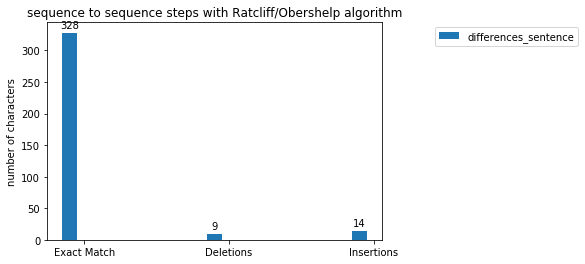

In [10]:
# Création d'une liste qui contient le nombre de mots exacts entre les deux séquences, le nombre de suppressions
# et le nombre d'ajouts.
# Creation of a list which contains the exact number of words between the two sequences, the number of deletions
# and the number of additions.
sequence_to_sequence_diff = [len(list_exact), len(number_deletions), len(number_add)]

# On importe le module de plot
# Plot module import
import matplotlib.pyplot as plt
import numpy as np

# Code adapté de la documentation matplotlib : https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# Code adapted from the matplotlib documentation: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

# On initialise les barres
# Bars initialization
bars1 = sequence_to_sequence_diff
 
# On définit la largeur des barres du graphique
# We define the width of the bars of the graph
barWidth = 0.1 

# On initialise la position des barres sur l'axe des ordonnées
# We initialize the position of the bars on the ordinate axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, bars1, barWidth, label='differences_sentence')


# On ajoute les titres les labels, les légendes éventuelles et on définit leurs places
# We add the titles the labels, the possible legends and we define their places
ax.set_ylabel('number of characters')
ax.set_title("sequence to sequence steps with Ratcliff/Obershelp algorithm")
plt.xticks([r + barWidth for r in range(len(bars1))], ['Exact Match', 'Deletions', 'Insertions'])
plt.legend(bbox_to_anchor = (1.6, 1), loc = 'upper right', prop = {'size': 10})

# Fonction qui permet d'attacher un nombre à la barre 
# Function which allows to attach a label as a number to the bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()

<a id="section3"></a>
## III. La comparaison par le nombre des étapes nécéssaires pour le passage d'une séquence à une autre : la distance de Levenshtein (distance d'édition) 

### 1. Périmètre et définition 

Les algorithmes basés sur la distance d'édition évaluent le nombre de modifications (*steps*) qui transformeront une chaîne en une autre. 

La **distance de Levenshtein** est une distance, au sens mathématique du terme, qui peut être considérée comme une généralisation de la distance de Hamming.

Le résultat de la distance d'édition entre deux mots R et P correspond au coût minimal pour transformer R en P en effectuant les seules opérations suivantes auxquelles sont associé un coût égal à 1 :

- Substitution d'un caractère de R par un caractère différent de P,
- Insertion dans R d'un caractère de P,
- Suppression d'un caractère de R dans P.

La formule est la suivante : 

$$ \qquad\operatorname{lev}_{a,b}(i,j) = \begin{cases}
  \max(i,j) & \text{ if } \min(i,j)=0, \\
  \min \begin{cases}
          \operatorname{lev}_{a,b}(i-1,j) + 1 \\
          \operatorname{lev}_{a,b}(i,j-1) + 1 \\
          \operatorname{lev}_{a,b}(i-1,j-1) + 1_{(a_i \neq b_j)}
       \end{cases} & \text{ otherwise.}
\end{cases} $$ 

##### Exemples 

- soit $R = "magasin"$ et $P="magasin"$, alors $LD(R, P) = 0$, car il n'y a pas de changement. 
- soit $R = "magasin"$ et $P="megasinier"$, alors $LD(R, P) = 4$, car il eu 3 insertions "ier" et une substitution "a" en "e". 

La distance de Levenshtein conserve l'ordre des séquences et peut se calculer à partir du mot ou du caractère. 

### 2. implémentations de la distance de Levensthein et visualisations

Pour calculer et récupérer rapidement les scores de la distance de Levensthein, on peut utiliser plusieurs packages Python : _fast_levenshtein est issue de la librairie du **OCR system Kraken (API)**, le package **Levenshtein (extension écrite C)** et **text_distance.**

In [11]:
from kraken.lib.dataset import _fast_levenshtein
from Levenshtein import editops, distance, hamming
import textdistance

edit_distance_words = _fast_levenshtein(reference_tokenize_words, hypothesis_tokenize_words)
edit_distance_char = _fast_levenshtein(reference_tokenize_char, hypothesis_tokenize_char)

######################################
print('\n')
print('\t\t\t*'*26)
print('\n')

print("\t\t\t--- Edit distance with Kraken API ---\n")
print(f'\t\t\tEdit distance by words : {edit_distance_words}')
print(f'\t\t\tEdit distance by characters  : {edit_distance_char}')

print('\n')
#print('\t\t\t*'*10)
#print('\n')

######################################

# retourne seulement la distance par caractère
# returns only the distance by characters
edit_distance = distance(reference_clean_text, hypothesis_clean_text)

######################################

print("\t\t\t--- Edit distance with Levenshtein C extension ---\n")
print(f'\t\t\tEdit distance  : {edit_distance}')

print('\n')
#print('\t\t\t*'*10)
#print('\n')

######################################

# renvoie seulement la distance par caractère
# returns only the distance by characters
edit_distance_Levenshtein = textdistance.levenshtein(reference_clean_text, hypothesis_clean_text)
edit_distance_Levenshtein_percent = textdistance.levenshtein.normalized_similarity(reference_clean_text, hypothesis_clean_text)

# une variation de la distance Levenshtein est la distance de Damerau-Levenshtein qui inclue les transpositions dans les 
# étapes de modification (fautes d'orthographe - échange de caractères), plutôt utilisée pour les correcteurs
# orthographiques. Par exemple dans le cas de "acceuil", "auteuil" et "accueil", la distance de Levensthein calcule une distance de 2
# entre chaque séquences cependant "acceuil" et "accueil" sont plus proches que "auteuil" et "acceuil", la distance
# de Damerau-Levenshtein prend en compte cette différence "acceuil" et "accueil" => 1 tandis que auteuil" et "acceuil" => 2
# une transposition de caractères coûte moins qu'une substitution

# a variation of the Levenshtein distance is the Damerau-Levenshtein distance which includes the transpositions in the
# modification steps (spelling mistakes - character exchange), rather used for proofreaders
# orthographies. For example in the case of "reception", "auteuil" and "reception", the distance from Levensthein calculates a distance of 2
# between each sequence however "acceuil" and "accueil" are closer than "auteuil" and "reception", the distance
# de Damerau-Levenshtein takes into account this difference "acceuil" and "accueil" => 1 while auteuil "and" acceuil "=> 2
# a character transposition costs less than a substitution
edit_distance_Levenshtein_Damereau = textdistance.damerau_levenshtein(reference_clean_text, hypothesis_clean_text)

######################################

print("\t\t\t--- Edit distance with textdistance ---\n")
print(f'\t\t\tEdit distance (Levenshtein)  : {edit_distance_Levenshtein}')
# Plus le score est proche de 100 %, plus la distance est faible et donc les phrases coincident 
# The closer the score is to 100%, the shorter the distance and therefore the sentences coincide
print(f'\t\t\tEdit distance (Levenshtein)  : {truncate(edit_distance_Levenshtein_percent)*100}%')
print(f'\t\t\tEdit distance (Levenshtein-Damereau)  : {edit_distance_Levenshtein_Damereau}')

print('\n')

######################################

# On peut également récupérer la distance de hamming. Cependant, les chaînes de caractères doivent être de même longueur.
# Ce qui peut être avantageux dans le cadre de l'évaluation d'une prédiction, ainsi si l'indicateur de Hamming existe
# cela présuppose que le modèle à récupéré une transcription de la même longueur que l'original.

# We can also recover the hamming distance. However, the strings must be the same length.
# Which may be advantageous when evaluating a prediction, so if the Hamming indicator exists
# this presupposes that the model to retrieve a transcription of the same length as the original.

######################################

print("\t\t\t--- Hamming distance with Levenshtein C extension ---\n")
 
    
print('\n')
print('\t\t\t*'*26)
print('\n')

######################################



			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*


			--- Edit distance with Kraken API ---

			Edit distance by words : 11
			Edit distance by characters  : 21


			--- Edit distance with Levenshtein C extension ---

			Edit distance  : 21


			--- Edit distance with textdistance ---

			Edit distance (Levenshtein)  : 21
			Edit distance (Levenshtein)  : 93.0%
			Edit distance (Levenshtein-Damereau)  : 21


			--- Hamming distance with Levenshtein C extension ---



			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*			*




Il est également possible de visualiser, sous forme de liste, les différentes étapes pour le passage d'une séquence à l'autre en renvoyant l'opération de modification et sa position dans le texte 

In [12]:
# Documentation Levenshtein : The result is a list of triples (operation, spos, dpos), where operation is one of 'equal', 'replace', 'insert', or 'delete'; 
# spos and dpos are position of characters in the first (source) and the second (destination) strings

edit_positions = editops(reference, hypothesis)

print(edit_positions)

[('delete', 27, 27), ('delete', 28, 27), ('delete', 29, 27), ('delete', 30, 27), ('replace', 46, 42), ('replace', 81, 77), ('replace', 134, 130), ('insert', 153, 149), ('insert', 153, 150), ('replace', 263, 261), ('replace', 264, 262), ('insert', 296, 294), ('insert', 296, 295), ('insert', 296, 296), ('insert', 296, 297), ('insert', 296, 298), ('insert', 296, 299), ('insert', 296, 300), ('insert', 296, 301), ('insert', 296, 302), ('insert', 296, 303)]


Pour évaluer un modèle de transcription, on peut, grâce à la distance d'édition et la fonction editops(), vues plus haut faire ressortir les paires d'erreurs 
les plus récurentes et visualiser ainsi où le modèle est le moins bien entraîné à reconnaître certains signes. Cela peut prendre la forme d'une "matrice de confusion" qui relève les erreurs les plus fréquentes (paires de confusion ou poids de confusion) et d'un rapport sous la forme des trois candidats de paires d'erreurs les plus fréquentes. 

**Source code confusion matrix** : code adapté de @L3viathan après une question postée sur [Stackoverflow - Is it possible to make a confusion matrix from character pairs?](https://stackoverflow.com/questions/62659180/is-it-possible-to-make-a-confusion-matrix-from-character-pairs)

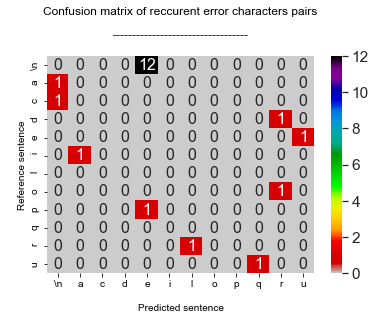

			--- ranking of the most recurring errors ---

1) TYPE : insert - FREQUENCY : 12 times - DETAILS : space (reference char) <->  e (predicted char)
2) TYPE : delete - FREQUENCY : 1 times - DETAILS : c (reference char) <-> space (predicted char)
3) TYPE : delete - FREQUENCY : 1 times - DETAILS : r (reference char) <-> l (predicted char)


In [13]:
from collections import defaultdict, Counter
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


# Une visualisation possible pour expliquer la matrice consisterait à évaluer les 3 paires d'erreurs
# les plus communes effectuées par un modèle (paires de confusion ou candidats les plus récurrents) et de produire un rapport.
# A possible visualization to explain the matrix will consist in evaluating the 3 pairs of errors
# the most common done by a model (pairs of confusion or most recurring candidates) and produce a report.

list_step = []
for a in edit_positions:
    for i in a:
        # on récupère la modification dans la liste
        # we get the modification in the list
        if i == "replace" or i == "insert" or i == "delete":
            list_step.append(i)
        else:
            # on remplace la position des caractères dans la phrase de référence et dans la phrase cible par les caractères 
            # eux-même via l'index
            # we replace the position of the characters in the reference sentence and in the target sentence with the characters
            # themselves via the index
            if len(reference_clean_text) != 0:
                list_step.append(reference_clean_text[i])
            else:
                pass
            if len(hypothesis_clean_text) != 0:
                list_step.append(hypothesis_clean_text[i])
            else:
                pass
            break

# on crée une liste de tuples : modification, caractère dans la référence, caractère dans la prédiction, nombre d'occurences
# de cette modification
# we create a list of tuples: modification, character in the reference, character in the prediction, number of occurrences
# of this modification
pair_errors = Counter(list(zip(list_step[::3], list_step[1::3], list_step[2::3]))).most_common()

operations = pair_errors

intermediary = defaultdict(Counter)
for (_, src, tgt), count in operations:
    intermediary[src][tgt] = count

letters = sorted({key for inner in intermediary.values() for key in inner} | set(intermediary.keys()))
letters_normalize = []
for letter in letters:
    if letter == " ":
        letters_normalize.append('\\n') 
    else:
        letters_normalize.append(letter)
    
confusion_matrix = [[intermediary[src][tgt] for tgt in letters] for src in letters]

df_cm = pd.DataFrame(confusion_matrix, letters_normalize, letters_normalize)
plt.title("""Confusion matrix of reccurent error characters pairs\n
----------------------------------\n""") # title of graph
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="nipy_spectral_r") # font size, color of confusion matrix
plt.xlabel('\nPredicted sentence') # label title for x coord
plt.ylabel('\nReference sentence') # label title for y coord

plt.show()

# On récupère seulement les 3 premiers candidats les plus récurrents via l'index 
# We only retrieve the first 3 most recurring candidates via the index
error_famous_candidates = pair_errors[:3]

counter = 1
print("\t\t\t--- ranking of the most recurring errors ---\n")
for a,times in error_famous_candidates:
    if a[0] == "insert" or a[0] == "delete":
        if a[1] == " ":
            print(f"{counter}) TYPE : {a[0]} - FREQUENCY : {times} times - DETAILS : space (reference char) <->  {a[2]} (predicted char)")
            counter += 1
        elif a[2] == " ":
            print(f"{counter}) TYPE : {a[0]} - FREQUENCY : {times} times - DETAILS : {a[1]} (reference char) <-> space (predicted char)")
            counter += 1
        else:
            print(f"{counter}) TYPE : {a[0]} - FREQUENCY : {times} times - DETAILS : {a[1]} (reference char) <-> {a[2]} (predicted char)")
            counter += 1
    else:
        print("no estimation")

La distance de Levensthein présente de nombreux avantages, nous pouvons ainsi implémenter directement l'algorithme pour récupérer une visualisation HTML des caractères supprimés ou insérés. Notons que Javascript permet des [visualisations dynamiques de la distance de Levensthein](https://codepen.io/jared-stilwell/pen/NPrVOm) dans le cadre d'une application web.

Le code ci-dessous est adapté pour les besoins de @Mateus Milanez [Stackoverflow - How to diff two string sequences in Python?](https://stackoverflow.com/questions/32500167/how-to-diff-two-string-sequences-in-python?noredirect=1&lq=1), À noter, que l'algorithme qui implémente la distance de Levenshtein ici renvoie une matrice $(m + 1)\times(n+1)$ dans le cadre de la programmation dynamique. 

Pour cette dernière version on renvoie à la documentation librairie python **numpy** et à l'article pour le détail de l'implémentation de  l'algorithme de Levenshtein : [Algorithm Implementation/Strings/Levenshtein distance](https://en.wikibooks.org/wiki/Algorithm_Implementation/Strings/Levenshtein_distance) CF. Bibliographie

In [14]:
from numpy import zeros
from IPython.core.display import HTML

def edDistDp(y, x):
        res = []
        D = zeros((len(x)+1, len(y)+1), dtype=int)
        D[0, 1:] = range(1, len(y)+1)
        D[1:, 0] = range(1, len(x)+1)
        for i in range(1, len(x)+1):
                for j in range(1, len(y)+1):
                        delt = 1 if x[i-1] != y[j-1] else 0
                        D[i, j] = min(D[i-1, j-1]+delt, D[i-1, j]+1, D[i, j-1]+1)

        # itère sur les valeurs de la matrice d'avant en arrière
        # iterate the matrix's values from back to forward

        i = len(x)
        j = len(y)
        while i > 0 and j > 0:
                diagonal = D[i-1, j-1]
                upper = D[i, j-1]
                left = D[i-1, j]

                # retour en arrière
                # check back direction
                direction = "\\" if diagonal <= upper and diagonal <= left else "<-" if left < diagonal and left <= upper else "^"
                i = i-1 if direction == "<-" or direction == "\\" else i
                j = j-1 if direction == "^" or direction == "\\" else j
                # Colorise les caractères avec des balises HTML
                # Colorize characters with HTML tags
                if (direction == "\\"):
                        if D[i+1, j+1] == diagonal:
                                res.append(f"<span style='color:black'>{x[i]}</span>")
                        elif D[i+1, j+1] > diagonal:
                            res.append(f"<span style='color:red'>{y[j]}</span>")
                            res.append(f"<span style='color:blue'>{x[i]}</span>")
                        else:
                            res.append(f"<span style='color:blue'>{x[i]}</span>")
                            res.append(f"<span style='color:red'>{y[j]}</span>")
                elif (direction == "<-"):
                        res.append(f"<span style='color:blue'>{x[i]}</span>")
                elif (direction == "^"):
                        res.append(f"<span style='color:red'>{y[j]}</span>")
        # retournement de la liste
        # reverse the list
        return res[::-1]
    
# -- Color code :
# blue => insertions
# red => deletions
# black => exact


# Afin de ne pas augmenter inutilement la taille du notebook, nous avons commenté les lignes qui suivent 
# In order not to unnecessarily enlarge the size of the notebook, we have commented on the following lines

# Version pour édition HTML
# Version for HTML edition
# print("".join(edDistDp(reference, hypothesis)))

# Version Notebook
# Notebook Version
# display(HTML("".join(edDistDp(reference, hypothesis))))

### 3. Le taux d'erreur par mots (WER) et le taux d'erreur par caractères (CER)

Le WER et le CER sont des indicateurs dérivés de la **distance d'édition (ou distance de Levenshtein)**.

Le taux d'erreur par mots , ou *word error rate* (**WER**) est une unité de mesure classique pour mesurer les performances d'un système de transcription.

Le WER indique le taux de mots incorrectement reconnus par rapport à la chaine de caractère de référence. Plus le taux est faible (min. 0.0) plus la reconnaissance est bonne. À noter que ce taux peut dépasser 1.0 en cas de très mauvaise reconnaissance; s'il y a beaucoup d'insertions.

On peut résumer le WER à la formule suivante:

$$ Word\, Error\, Rate = \frac{S\, + \,D\, + \,I\,}{N} $$

où :

- $N$ est le nombre total de mots contenus dans la phrase de référence,
- $S$ (Substitution) est le nombre de substitutions (mots incorrectement reconnus),
- $D$ (Deletion) est le nombre de suppressions (mots omis),
- $I$ (Insertion) est le nombre d'insertions (mots ajoutés),

Le taux d'erreur par caractères, *character error rate* (**CER**) est une variation plus précise du WER, qui travaille au niveau des caractères au lieu des mots.

On peut résumer le CER à la formule suivante:

$$ Character\, Error\, Rate = \frac{S\, + \,D\, + \,I\,}{N} $$

où :

- $N$ est le nombre total de caractères contenus dans la phrase de référence,
- $S$ (Substitution) est le nombre de substitutions (caractères incorrectement reconnus),
- $D$ (Deletion) est le nombre de suppressions (caractères omis),
- $I$ (Insertion) est le nombre d'insertions (caractères ajoutés), 

Ainsi on peut rammener l'opération dans le calcul du WER et du CER : $ S\, + \,D\, + \,I\, $ à la distance d'édition.

**Avantages et limites :** le WER et le CER sont des indicateurs moins précis que la distance d'édition car il ne donne pas le résultat des modifications, mais un résultat très général sur le nombre de mots ou de caractères correctemment reproduit dans la prédiction.

#### Calcul du WER et du CER

In [15]:
WER = float( edit_distance_words / len(reference_tokenize_words)) 
CER = float( edit_distance_char /len(reference_tokenize_char))
WER_percent = float( edit_distance_words / len(reference_tokenize_words)) * 100
CER_percent = float( edit_distance_char /len(reference_tokenize_char)) * 100

print(f"\n\tWord Error Recognition : {truncate(WER)}\n")
print(f"\tCharacter Error Recognition : {truncate(CER)}\n")
print('\t*'*3)
print(f"\n\tWER (%) : {truncate(WER_percent)} %\n")
print(f"\tCER (%) : {truncate(CER_percent)} %\n")


	Word Error Recognition : 0.07

	Character Error Recognition : 0.06

	*	*	*

	WER (%) : 7.38 %

	CER (%) : 6.23 %



<a id="section4"></a>
## III. La comparaison basée sur la concordance des tokens entre deux séquences : l'indice de Jaccard 

### 1. Périmètre et définition 

Contrairement aux autres familles d'algorithmes vues plus haut, ceux qui sont basés sur les tokens ne conservent pas l'ordre de la phrase. Les algorithmes *based-tokens* cherchent en effet à savoir quel est le plus grand nombre de caractères ou de mots en communs pour déterminer si deux textes semblent se rapprocher dans leur signification. Dès lors, on parle de similarité "sémantique" et non plus "syntaxique". Parmi ces modèles, l'indice de Jaccard (ou *indice de communauté* en statistique).

L'indice de Jaccard évalue, sur l'union de deux ensembles (deux phrases par exemple), la taille de l'intersection qui regroupe les mots en commun dans la référence et dans l'hypothèse divisée par la taille de l'union de deux ensembles.
Il est formulé comme suit :

$$ J(A,B) = \frac{|A \cap B|}{|A \cup B|} $$

Plus le résultat approche de 1, plus la référence est proche de l'hypothèse, car le nombre des mots partagés par la référence et l'hypothèse dans l'intersection est important.

**Avantages et limites** : L'indice de Jaccard peut servir sur des grands corpus de textes pour avoir un indicateur rapide de similarité, cependant il faut veiller à conserver une vue sur l'ordre de la séquence prédite, car la présence de deux mots dans deux phrases ne signifie pas que leurs positions sont similaires.

### 2. Implémentations

In [16]:
def get_jaccard_similarity(str1, str2):
    """
    
    """
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

print(f"result Jaccard similarity : {truncate(get_jaccard_similarity(reference_clean_text, hypothesis_clean_text))}")

result Jaccard similarity : 0.8


<a id="section5"></a>
## IV. La comparaison basée sur la direction des mots comme coordonnées dans un espace vectoriel  : la similarité cosinus

### 1. Périmètre et définition

La similarité cosinus (ou mesure cosinus, *Cosine similarity* ) est un indicateur *based-tokens* comme l'indice de Jaccard, il ne conserve pas l'ordre des caratères dans la séquence et évalue le nombre de *match* communs entre tokens, utile sur de grands corpus de textes (fouille de textes). Cependant la méthode de calcul de la similarité cosinus diffère de l'évaluation probabiliste de l'indice de Jaccard. 
 
Au sens mathématique, le résultat permet de calculer la similarité entre deux vecteurs à $n$ dimensions en déterminant le cosinus de l'angle entre eux. 

Il peut être utilisé comme mesure de ressemblance entre deux chaînes de caratères, pour mesurer leur degré de proximité. Comme préalable, il faut changer les valeurs chaînes de caractères en vecteurs (récupérer leurs coordonnées). 

La valeur de $cos(\theta)$ peut-être :

- 0 : vecteurs indépendants ou opposés (orthogonaux),

- 1 : vecteurs similaires (colinéaires de coefficient positif).

La valeur pour les données textuelles de -1 est impossible en raison des coordonnées toujours strictement positives des vecteurs, ainsi on peut dire que

$$ similarity\, = cos\, (\theta\,) = \frac{\overrightarrow{V1}\, \times \,\overrightarrow{V2}}{||\overrightarrow{V1}||\, \times \,||\overrightarrow{V2}||} $$

où : 

$$ ||\overrightarrow{V1}||\, et\, ||\overrightarrow{V2}||\, >\, 0 $$



### 2. Implémentations

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# 1) On récupère les coordonnées des vecteurs (toujours positifs)
# 1) We recover the coordinates of the vectors (always positive)

def get_vectors(*str):
    """
    """
    text = [t for t in str]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

# 2) Calcule de l'angle cosinus
# 2) Calculate the cosine angle

def get_cosine_sim(*str): 
    vectors = [t for t in get_vectors(*str)]
    return truncate(cosine_similarity(vectors)[0][1])

# 3) Récupération du résultat
# 3) Recovery of the result

cos_sim = get_cosine_sim(reference_clean_text, hypothesis_clean_text)

print(f"result cosine similarity : {cos_sim}")

# 4) Évaluation du résultat
# 4) Evaluation of the result

if cos_sim >= 0.5 and cos_sim != 1:
    print("=> the reference has strong agreement with prediction")
if cos_sim < 0.5 and cos_sim != 0:
    print("=> the prediction is far from the reference")
if cos_sim == 1.0:
    print("=> the two texts are equal")
if cos_sim == 0:
    print("=> the two texts are different")

result cosine similarity : 0.98
=> the reference has strong agreement with prediction


<a id="section6"></a>
## IV. La séquence comprise comme un signal dans le temps : essai d'analogie avec les techniques du traitement du signal dans la similarité séquence 

Dans cette dernière partie nous partons de l'intuition qu'il est possible de représenter une séquence de caractères comme un signal qui se déroule dans le temps, on tente l'analogie. Ce temps correspondrait alors au déroulement de la séquence par caractère. 


On pourrait alors constituer des visualisations plus précises que celles vues jusqu'à présent sur le déplacement d'une séquence par rapport à l'autre (dispersion), des types de caractères confondus régulièrement ou bien encore évaluer si les variations entre les caractères sont fortes ou non (d'un point de vue sémantique ou syntaxique).

Nous décrivons l'algorithme en détail qui permet de telles visualisations :

#### 1 ) Référencement des types de caractères et constitution d'un dictionnaire

La première étape est de référencer des types de caractères, afin d'avoir un spectre le plus large possible. Dans le cadre de l'alphabet latin nous pouvons trouver les types suivants :  

$$ \left \{
\begin{array}{}
char_{alpha}  : lettres\, minuscules\, de\, l'alphabet\, latin\, \\
char_{num}  : les\, chiffres\, (0\, à\, 9\,)\, \\
char_{interlacted}  : lettres\, entralacées\, telles\, que\, "æ",\, "œ"\, \\
char_{punct}  : signes\, de\, ponctuation\, \\
char_{space}  : espace\, \\
char_{acute}  : signes\, d'accentuation\, \\
char_{alpha-acute}  : lettres\, minuscules\, de\, l'alphabet\, latin\, accentuées\, \\
char_{alpha-capitalize}  : lettres\, de\, l'alphabet\, latin\, et\, lettres\, entralacées\, en\, capitales\, \\
char_{alpha-capitalize-acute}  : lettres\, de\, l'alphabet\, latin\, en\, capitales\, et\, accentuées\, \\
\end{array}
   \right .$$
   
Dès lors on pourrait créer une série continue $ S_{char} $, soit une liste, qui comprend alors l'ensemble des caractères évoqués plus haut. Leur place dans la liste correspondrait à la position noté $ n $ .

On définit également trois poids (ou coût) notés $ \omega $ associés à des transformations telles que :

$$ \left \{
\begin{array}{}
\omega_{acute}(n) = n + 0.5 : phénomène\, d'accentuation \\
\omega_{capitalize}(n) = n + 0.1 : phénomène\, de\, capitalisation \\
\omega_{capitalize-acute}(n) = n + 0.6 : phénomène\, couplé\, d'accentuation\, et\, de\, capitalisation \\
\end{array}
    \right .$$

La seconde étape consiste alors à créer un dictionnaire $D_{char}$ dont la clé correspondrait au caractère présent dans la série $ S_{char} $ et dont la valeur corresponderait à la position du caractère dans la série $ S_{char} $ plus l'affectation d'un poids $ \omega $ si une transformation est effectuée sur un caractère minuscule.

##### description de l'algorithme pour la constitution du dictionnaire $D_{char}$ 


Variables fixes :

- space correspond $ char_{space} =\, "\,\," $

    -- Poids :

- F_acute correspond à $ \omega_{acute}(n) = n + 0.5 $

- F_capitalize correspond à $ \omega_{capitalize}(n) = n + 0.1 $

- F_capitalize-acute correspond à $ \omega_{capitalize-acute}(n) = n + 0.6 $

  -- Dictionnaire :

- D_char correspond $ D_{char} $

  -- Listes :

- S_char correspond à $S_{char}$

- S_char_noacute correspond à $S_{char_{non-acute}}$

- S_char_acute correspond à $S_{char_{acute}}$

- S_char_num correspond à $S_{char_{num}}$

- S_char_interlacted correspond à $S_{char_{interlacted}}$

- S_char_punct correspond à $S_{char_{punct}}$

```
POSITION = 1

TANT QUE char → S_char : # "→" == DANS

    # Etape 1) cas 1 des caractères alphabétiques minuscules

    FAIRE  D_char[char] ← char = POSITION # ici char == valeur / [char] == clé

    # Etape 2) cas 2 des caractères alphabétiques majuscules

    FAIRE  D_char[upper(char)] ← char = F_capitalize(POSITION)
    
    # Etape 3) a répeter si char est un candidat pour recevoir un accent

    SI char → S_char_noacute :
    
        INDEX  ← 0
    
        TANT QUE INDEX < LONGUEUR(S_char_acute):
        
            TANT QUE char_acute → S_char_acute:
        
                # Etape 4) cas 3 des caractères alphabétiques minuscules accentués
    
                FAIRE D_char[char_acute] ← char = F_acute(POSITION)
                
                # Etape 5) cas 4 des caractères alphabétiques majuscules accentués
                
                FAIRE D_char[upper(char_acute)] ← char = F_capitalize-acute(POSITION)
                
    FAIRE POSITION += 1     
    
    # Etape 6) cas 5 des caractères numériques
    
    SINON SI char → S_char_num:
    
        FAIRE D_char[char] ← char = POSITION
        
        FAIRE POSITION += 1
        
    # Etape 7) cas 6 des caractères alphabétiques entralacés
        
    SINON SI char → S_char_interlacted:
    
        FAIRE D_char[char] ← char = POSITION
        
        # Etape 8) cas 7 des caractères alphabétiques entrelacés majuscules
        
        FAIRE D_char[upper(char)] ← char = F_capitalize(POSITION)
        
        FAIRE POSITION += 1
        
    # Etape 9) cas 6 de la ponctuation 
        
    SINON SI char → S_char_punct:
    
        FAIRE D_char[char] ← char = 0.5
        
    # Etape 9) cas 6 de la ponctuation 
        
    SINON : # correspond à char == space
    
        FAIRE D_char[char] ← char = 0
        
RETOURNER D_char
    
```

#### 2) Conversion d'une phrase de référence $ P_{reference} $ et de prédiction $ P_{prediction} $  sous la forme de signaux $ sgn(P_{reference}) $ et  $ sgn(P_{prediction}) $

Soit une phrase de référence $ P_{reference} $ et une phrase de prédiction $ P_{prediction} $.

Une nouvelle étape consiste effectue deux actions :

- on crypte une séquence de caractères suivant la valeur à laquelle elle est associée dans le dictionnaire $D_{char}$ (comme si on cryptait une phrase en morse). Les caractères ont été traduits par les positions-poids notées $ n\omega $ dans deux série distinctes : $ S_{reference_{n\omega}} $ et $ S_{prediction_{n\omega}} $;

- on crée deux séries d'étapes qui prennent les caractères un par un de la séquence en lui affectant une valeur n puis n+1 de manière linéaire tel que si l'on a "Bonjour" on obtiendra $ [1, 2, 3, 4, 5, 6, 7] $, on obtient alors deux séries distinctes $ S_{reference-steps} $ et $ S_{prediction-steps} $

Dès lors on peut dire abusivement que $$ sgn(P_{référence}) = \frac{S_{reference_{n\omega}}}{S_{reference-steps}}\,  et\, sgn(P_{prédiction}) = \frac{S_{prediction_{n\omega}}}{S_{prediction-steps}}$$ 

#### 2) Visualisations et métriques associées aux signaux $ sgn(P_{reference}) $ et  $ sgn(P_{prediction}) $


Une première visualisation consiste alors à prendre en abscisses ($x$) $ S_{reference-steps} $ et $ S_{prediction-steps} $ qui correspond au déroulement de la phrase dans le temps et en ordonnées ($y$) $ S_{reference-steps} $ et $ S_{prediction-steps} $. On visualise alors les distances entre les deux signaux dans des espaces tel que : 

L'ensemble serait alors composé de 5 espaces qui contiennent les variables telles que :

$$ \left \{
\begin{array}{}
L'espace\, des\, lettres\, de\, l'alphabet\, situé\, dans\, l'intervalle\, 1 <= y <= 26\\
L'espace\, des\, nombres\, situé\, dans\, l'intervalle\, 28 <= y <= 38 \\
L'espace\, des\, lettres\, entralacées\, situé\, dans\, l'intervalle\,  27 <= y <= 28.5\\
Deux\, droites\, qui\, représentent\, l'espace\, des\, ponctuations\, et\, des\, espaces\, en\, x=0\, et\, x=0.5)\\
\end{array}
    \right .$$

On peut voir plus bas dans ce notebook des essais de cette proposition de visualisation et les quelques observations et interprétations que l'on peut en déduire.

#### 2) Visualisation par les deltas $ \Delta $

Une seconde visualisation s'appuie sur les variations (deltas) c'est-à-dire les distances correpondant aux résultats des différences du poid-position $ n\omega $ du caractère appartenant à $ P_{prediction} $ et du poid-position $ n\omega $ du caractère appartenant à $ P_{reference} $, tel que : $$ \Delta = y_{n\omega_{prediction}} - y_{n\omega_{reference}} $$

Une fois la liste des deltas récupérée, on peut calculer la moyenne $\mu$ des deltas $ \Delta $ en utilisant la formule : $$ \overline{\Delta_{y}} = \mu = \frac{\sum_{i=1}^n \Delta_{y_{i}}}{nombre\, total\, des\, \Delta_{y}(n)}$$

Enfin on calcule l'écart-type noté $ \sigma $ qui correspond à une mesure de dispersion (ici des deltas). L'écart-type correspond à la racine carrée de la variance soit la moyenne des carrés des écarts à la moyenne $\mu$ (calculé plus haut), dont la formule est : $$\overline{\Delta_{y}}^2 = variance = \frac{\sum_{i=1}^n \Delta_{y_{i}^2}}{nombre\, total\, des\, \Delta_{y}(n)}$$ à noter que la $$ variance > 0 $$

Donc l'écart-type sera égal à la formule : $$ \sigma = \sqrt[]{variance} = \sqrt{\overline{\Delta_{y}}^2}$$

À partir de ces calculs, on formera un tracé des deltas, puis on tracera la moyenne $\mu$ enfin on constituera à partir de l'écart-type des intervalles autour de la moyenne en multipliant l'écart-type par un coefficient plus ou moins important, pour classifier les points selon qu'ils sont plus ou moins éloignés de la moyenne $\mu$ en récupérant le pourcentage de points présents dans chaque intervalle. 

On peut encore voir plus bas dans ce notebook des essais de cette proposition de visualisation et quelques observations et interprétations que l'on peut en déduire.

Afin de d'implémenter ces différentes visualisations des séquences sous forme de signaux nous avons créé une micro-libraire Sequences to Signals (STSg) qui résume ce que l'on a évoqué plus haut. Ici, on passe par la programmation objet qui permet de définir et de rendre personnalisable les paramètres et attributs comme la configuration du dictionnaire, des visualisations et de récupérer des métriques comme la moyenne des deltas ou la variance des deltas.

Les commentaires dans le code-source de la librairie constituent des indications sur les implémentations.

In [18]:
# -*- coding: utf-8 -*-
#
# Copyright 2020 Lucas Terriel
#
# Sequences to Signals - STSig 
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express
# or implied. See the License for the specific language governing
# permissions and limitations under the License.
#
# Sequences to Signals - STSig is a micro experiemental library write in Python is a part of large Sequences to Similarity (STS) library
# implemented in Kraken-Benchmark application.

import math
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
        
class SetDictionaryCharWeightPosition:
    """Configure the character types, by default the types char are configured 
    for the alphabet and the Latin characters in this order :
    
    alphabetic chars >> chars acute and chars non-acute >> intercaled chars >> numerical chars >> punctuation serie >>
    space serie
    
    Then, configure the weights of transformations such as accentuation, capitalization, space (fixed value), 
    punctuation (fixed value)
    
    Also see __init__ method and _get_dict_char_weight() boundmethod below.
    
    Attributes
    ==========
    
    Basics chars configuration :
    ----------------------------
    ----------------------------
    
    char_alpha_serie : list
        Alphabetic char serie
    char_num_serie : list
        Numerical char serie
    char_interlacted_serie : list
        Interlacted char serie
    char_punct_serie : list
        punctuation serie
    char_space_serie : list
        space char serie
        
    Basics chars acute and no acute :
    ---------------------------------
    ---------------------------------
    
    Note
    ----
    If you choose to configure a series of characters with accent fill 
    a list with the same character carrying the accent and another list 
    of the same character without accent, Be careful both must be of the same length
    
    Example
    -------
    alpha_noacute_a = list("aaaaaa") <=> acutes_a = list("áàâäãå")
    
    Actual list acute
    -----------------
    => a, c, e, i, n, o, u, y
    
    alpha_noacute_{char in actual list aucute} : list
        Numerical char serie
    alpha_acute_{char in actual list aucute} : list
        Numerical char serie
        
    Weights of transformations :
    --------------------------------------
    --------------------------------------
    
    weight_punctuation : int
        weight according to the punctuation add
    weight_acute : int
        weight according to the prominent character 
    weight_capitalize : int
        weight according to the capitalize character
    weight_space : int
        weight according to a space
    
        ****** Defaults values for weight ******
        
        - weight_punctuation -> 0.5
        - weight_acute -> 0.5
        - weight_capitalize -> 0.1
        - weight_space -> 0
    
        ****************************************
        
    """
    
    def __init__(self) -> None:
        # Set basics chars series
        self.char_alpha_serie = list("abcdefghijklmnopqrstuvwxyz")
        self.num_serie = list("0123456789")
        self.interlacted_serie = list("æœ")
        self.punct_serie = list("][!\"#$%&'()*+,./:;<=>?@\^_`{|}~-—’")
        self.space_serie = list(" ")
        
        # Set basics chars non-acute series
        self.alpha_noacute_a = list("aaaaaa")
        self.alpha_noacute_c = list("c")
        self.alpha_noacute_e = list("eeee")
        self.alpha_noacute_i = list("iiii")
        self.alpha_noacute_n = list("n")
        self.alpha_noacute_o = list("ooooo")
        self.alpha_noacute_u = list("uuuu")
        self.alpha_noacute_y = list("yy")
        
        # Set basics chars acute series
        
        self.acutes_a = list("áàâäãå")
        self.acutes_c = list("ç")
        self.acutes_e = list("éèêë")
        self.acutes_i = list("íìîï")
        self.acutes_n = list("ñ")
        self.acutes_o = list("óòôöõ")
        self.acutes_u = list("úùûü")
        self.acutes_y = list("ýÿ")
        
        # Set weights transformation 
        
        self.weight_punctuation = 0.5
        self.weight_acute = 0.5
        self.weight_capitalize = 0.5
        self.weight_space = 0
        
        # list contains all chars (this order is very important, determine the position and char areas
        # for plot signals in next steps - see bellow)
        
        self.all_char_series = self.char_alpha_serie + self.interlacted_serie + self.num_serie + self.punct_serie + self.space_serie
        
    def _get_dict_char_weight(self) -> dict:
        """generates a dictionary with the predefined character set
        in __init__method as a key and its weight position in value.
        
        :return: dictionnary with char (key) and position-weight (value)
        :type return: dict
        """
        
        def transport_char_alpha_to_weight_cap_acu(acutes_char: list, position: int, weight_acute: int, weight_capitalize: int) -> None:
            """main function routine for processing accents in alphabetic char 
            
            :param acutes_char: preset list of acute char 
            :type acutes_char: list
            :param position: position of char in dictionnary
            :type position: int
            :param weight_acute: weight for preset emphasis
            :type weight_acute: int
            :weight_capitalize: weight for preset capitalization
            :type weight_capitalize: int
            """
            i = 0
            while i < len(acutes_char):
                for char_acute in acutes_char:
                    position_weight_char[char_acute] = position + weight_acute
                    position_weight_char[char_acute.upper()] = position + weight_acute + weight_capitalize
                    i += 1
        
        position = 1
        # creation of an empty reference dictionary to accommodate a character and its weight
        position_weight_char = {}
        for char in self.all_char_series:
        # case 1: alphabetic characters (n + 1)
            if char in self.char_alpha_serie:
                position_weight_char[char] = position
                # case 2: uppercase alphabetic characters ((n + 1) +0.1)
                position_weight_char[char.upper()] = position + self.weight_capitalize 
                # cases 3 and 4: alphabetic characters with accent ((n + 1) +0.5) and alphabetical characters in capital letters with accent
                # ((n+1)+0.5+0.1)
                if char in self.alpha_noacute_a:
                    transport_char_alpha_to_weight_cap_acu(self.acutes_a, position, self.weight_acute, self.weight_capitalize)
                if char in self.alpha_noacute_c:
                    transport_char_alpha_to_weight_cap_acu(self.acutes_c, position, self.weight_acute, self.weight_capitalize)
                if char in self.alpha_noacute_e:
                    transport_char_alpha_to_weight_cap_acu(self.acutes_e, position, self.weight_acute, self.weight_capitalize)
                if char in self.alpha_noacute_i:
                    transport_char_alpha_to_weight_cap_acu(self.acutes_i, position, self.weight_acute, self.weight_capitalize)
                if char in self.alpha_noacute_n:
                    transport_char_alpha_to_weight_cap_acu(self.acutes_n, position, self.weight_acute, self.weight_capitalize)
                if char in self.alpha_noacute_o:
                    transport_char_alpha_to_weight_cap_acu(self.acutes_o, position, self.weight_acute, self.weight_capitalize)
                if char in self.alpha_noacute_u:
                    transport_char_alpha_to_weight_cap_acu(self.acutes_u, position, self.weight_acute, self.weight_capitalize)
                if char in self.alpha_noacute_y:
                    transport_char_alpha_to_weight_cap_acu(self.acutes_y, position, self.weight_acute, self.weight_capitalize)
                position += 1
            # case 5: numeric characters (n + 1)
            if char in self.num_serie:
                position_weight_char[char] = position
                position += 1
            # case 6: interlaced characters (n + 1)
            if char in self.interlacted_serie:
                position_weight_char[char] = position
                # case 7: interlaced characters in capital letters ((n + 1) +0.1)
                position_weight_char[char.upper()] = position + self.weight_capitalize
                position += 1
            # case 8: punctuation (0.5)
            if char in self.punct_serie:
                position_weight_char[char] = self.weight_punctuation
            # case 9: space (0)
            if char == " ":
                position_weight_char[char] = self.weight_space
        return position_weight_char

# we create the function to encrypt the signal sequence outside the class

def encrypt_steps_sentence_to_signal(sequence: str, dictionnary_char_position_weight: dict) -> list:
    """successively encrypts the characters contained in the sequence with 
    respect to the key and the dictionary value. 
    Also lists the steps in the sequence, such as char1 = 1, char2 = 2 ...
    
    :param sequence: sequence to encrypt
    :type sequence: str
    :param dictionnary_char_position_weight: dictionnary with char (key) and it weight-position (value)
    :returns: encrypted sequence / steps in the sequence
    :type returns: list 
    """
    
    # case 10 : char no solve in dict (-1)
    encrypt_sequence_weight_position = [dictionnary_char_position_weight[char] 
                                        if char in dictionnary_char_position_weight.keys() 
                                        else -1  
                                        for char in sequence]
    sequence_steps = [char_sequence for char_sequence in range(len(sequence))]
    
    return encrypt_sequence_weight_position, sequence_steps


def _get_deltas(reference_encrypt: list, prediction_encrypt: list, reference: str, prediction: str) -> int:
    """retrieve the deltas which correspond to the difference in the weight-position 
    of sequence 1 compared to sequence 2 such that :
    
    Formula : delta = yS2 - yS1
    
    :param reference_encrypt: reference sequence encrypted with dictionary
    :type reference_encrypt: list
    :param prediction_encrypt: prediction sequence encrypted with dictionary
    :type prediction_encrypt: list
    :param reference: sequence of char (reference)
    :type reference: str
    :param prediction: sequence of char (prediction)
    :type prediction: str
    :return: list of deltas
    :type return: list
    
    """
    deltas = []
    for delta_1, delta_2 in zip(reference_encrypt, prediction_encrypt):
        deltas.append(delta_2 - delta_1)
    return deltas

class SequencesToSignals(SetDictionaryCharWeightPosition):
    """a class to create the dictionary, and retrieve the 
    mean of the deltas (located between 0 and 1, if 0 the two 
    sequences are similar and if close to 1 the sequences are not really similar) 
    and the variance of the deltas (mean squared) to assess the error dispersion 
    index (the higher it the higher the distance between the deltas and high).
    
    Attributes
    ==========
    object_char_position_weight_dict: obj
        get the attributes and properties of the class SetDictionaryCharWeightPosition
     
    dictionary_latchar_position_weight : dict
        dictionary of the character (key) and its weight-position (value) 
        according to the values defined in SetDictionaryCharWeightPosition class
    
    sequence_reference_encrypt: list
        reference sequence encrypted
    
    sequence_reference_steps: list
        reference sequence steps
    
    sequence_prediction_encrypt: list
        prediction sequence encrypted
    
    sequence_prediction_steps: list
        prediction sequence steps
    
    Metrics
    =======
    
    list_deltas: list
        list of deltas (yS2 - yS1) compute with _get_deltas() function
    expected_value_deltas: int
        value of deltas average is the result of (sum(deltas)/total deltas).
        basic it returns a negative result, however for readability 
        we multiply the result by the result itself to obtain a positive value between 0 and 1.
    variance_deltas: int
        value of delta variance always positive and all the greater as the values 
        of the deltas are spread out. it is a measure of dispersion. 
        Formula : sum(deltas**2) - average_deltas ** 2
        
    
    Parameters
    ==========
    sequence_reference: str
        user's reference sequence
    sequence_prediction: str
        user's prediction sequence
        
    """

    def __init__(self, sequence_reference : str, sequence_prediction : str) -> None:
        SetDictionaryCharWeightPosition.__init__(self)
        self.sequence_reference = sequence_reference
        self.sequence_prediction = sequence_prediction
        self.object_char_position_weight_dict = SetDictionaryCharWeightPosition()
        self.dictionary_latchar_position_weight = self.object_char_position_weight_dict._get_dict_char_weight()
        self.sequence_reference_encrypt, self.sequence_reference_steps = encrypt_steps_sentence_to_signal(self.sequence_reference, self.dictionary_latchar_position_weight)
        self.sequence_prediction_encrypt, self.sequence_prediction_steps = encrypt_steps_sentence_to_signal(self.sequence_prediction, self.dictionary_latchar_position_weight)
        self.list_deltas = _get_deltas(self.sequence_reference_encrypt, self.sequence_prediction_encrypt, self.sequence_reference, self.sequence_prediction)
        
    def expected_value_deltas(self) -> int:
        """calculates the average of the deltas
            
        :param list_deltas: list of deltas
        :type list_deltas: list
        :param return: average score of deltas
        :type return: int
        """
        if len(self.sequence_prediction) == 0:
            return "no expected value deltas because your prediction is null"
        else:
            sum_deltas = 0
            for delta in self.list_deltas:
                sum_deltas += delta
                expected_value = (sum_deltas / len(self.list_deltas))
        return expected_value

        

    def variance_standard_deviation_deltas(self, expected_value: int) -> int:
        """calculates the variance of the deltas
            
        :param list_deltas: list of deltas
        :type list_deltas: list
        :param returns: variance score of deltas / standard deviation score
        :type return: int
        """
        if len(self.sequence_prediction) == 0:
            return "no variance and standard deviation because the prediction is null"
        else:
            s1 = 0
            n = len(self.list_deltas)
            for delta in self.list_deltas:
                s1 += delta * delta
            variance = (s1 / n) - (expected_value ** 2)
            standard_deviation = math.sqrt(variance)
        return variance, standard_deviation
    
            
class PlotSTS(SequencesToSignals):
    """a class to represent the sequences in the form of a signal 
    with at x the character steps of the sequences and at y the 
    weight positions of the characters.
    
    Many options are available for visualizations, see below the method
    _plot_sentences_signal() for more details.
    
    Attributes
    ==========
    reference: str
        user's reference sequence
        
    prediction: str
        user's prediction sequence
        
    reference_encrypt: list
        reference sequence encrypted
        
    reference_steps: list
        reference sequence steps
        
    prediction_encrypt: list
        prediction sequence encrypted
        
    prediction_steps: list
        prediction sequence steps
        
    dictionary_char_weight_cost: dict
        dictionary of the character (key) and its weight-position (value) 
        according to the values defined in SetDictionaryCharWeightPosition class
        
    list_steps_max: list
        retrieves the most longer steps sentence list
    
    Parameters
    ==========
    reference: str
        user's reference sequence
        
    prediction: str
        user's prediction sequence
        
    reference_encrypt: list
        reference sequence encrypted
        
    reference_steps: list
        reference sequence steps
        
    prediction_encrypt: list
        prediction sequence encrypted
        
    prediction_steps: list
        prediction sequence steps
        
    dictionary_char_weight_cost: dict
        dictionary of the character (key) and its weight-position (value) 
        according to the values defined in SetDictionaryCharWeightPosition class
    
    list_deltas: list
        list of deltas
    
    """
    
    
    def __init__(self, 
                 reference, 
                 prediction, 
                 reference_encrypt, 
                 prediction_encrypt, 
                 reference_steps, 
                 prediction_steps, 
                 dictionary_char_weight_cost, 
                 list_deltas) -> None:
        
        SequencesToSignals.__init__(self, reference, prediction)
        self.GroupSequencesToSignals = SequencesToSignals(reference, prediction)
        
        self.reference = reference
        self.prediction = prediction
        
        self.reference_encrypt = reference_encrypt
        self.prediction_encrypt = prediction_encrypt
        
        self.reference_steps = reference_steps
        self.prediction_steps = prediction_steps
        
        self.dictionary_char_weight_cost = dictionary_char_weight_cost
        
        self.list_deltas = list_deltas
        self.list_steps_min = min(self.reference_steps, self.prediction_steps)
        
        # variables for probabilities
        # ---------------------------
        
        # Average of deltas (μ - mu)
        self.μ = self.GroupSequencesToSignals.expected_value_deltas()
        
        # Variance and standard deviation (δ - sigma) of deltas 
        self.variance, self.δ = self.GroupSequencesToSignals.variance_standard_deviation_deltas(self.μ)
        
        # initialization of standard deviation intervals
        
        ## coefficient of intervals
        
        self.coefficient_large = 2
        self.coefficient_mid = 1.5
        
        ## by default μ - 2*δ / μ + 2*δ
        self.mu_2δ_negative = (self.μ - self.coefficient_large*self.δ)
        self.mu_2δ_positive = (self.μ + self.coefficient_large*self.δ)
        
        ## by default μ - 1.5*δ / μ + 1.5*δ
        self.mu_1_5δ_negative = (self.μ - self.coefficient_mid*self.δ)
        self.mu_1_5δ_positive = (self.μ + self.coefficient_mid*self.δ)
        
        ## by default μ - δ / μ + δ (fixed)
        self.mu_δ_negative = (self.μ - self.δ)
        self.mu_δ_positive = (self.μ + self.δ)
        
        
        def catch_sum_deltas_into_intervals(list_deltas: list,
                                            mu_2δ_negative: int,
                                            mu_2δ_positive: int,
                                            mu_1_5δ_negative: int,
                                            mu_1_5δ_positive: int,
                                            mu_δ_negative: int,
                                            mu_δ_positive: int,
                                            mu: int):
            """
            
            """
            # initialization of the intervals to recover the deltas sums    
            sum_deltas_big = 0
            sum_deltas_large = 0
            sum_deltas_mid = 0
            sum_deltas_small = 0
            
            for delta in list_deltas:
                if (delta <= mu_2δ_negative) or (delta >= mu_2δ_positive):
                    sum_deltas_big += abs(delta)
                    
                elif (mu_1_5δ_positive <= delta < mu_2δ_positive) or (mu_2δ_negative < delta <= mu_1_5δ_negative):
                    sum_deltas_large += abs(delta)
                    
                elif (mu_δ_negative <= delta < mu_1_5δ_negative) or (mu_δ_positive <= delta < mu_1_5δ_positive):
                    sum_deltas_mid += delta
                    
                elif (mu < delta <= mu_δ_positive) or (mu_δ_negative <= delta < mu):
                    sum_deltas_small += delta
                    
            return sum_deltas_small, sum_deltas_mid, sum_deltas_large, sum_deltas_big
        
        ## retrieving delta sum intervals
        
        self.sum_deltas_small,self.sum_deltas_mid, self.sum_deltas_large, self.sum_deltas_big = catch_sum_deltas_into_intervals(self.list_deltas,
                                                              self.mu_2δ_negative,
                                                              self.mu_2δ_positive,
                                                              self.mu_1_5δ_negative,
                                                              self.mu_1_5δ_positive,
                                                              self.mu_δ_negative,
                                                              self.mu_δ_positive,self.μ)
        
        

    def _plot_sentences_signal(self, 
                               dpi=150, 
                               save_figure=False, 
                               title="Sequences to Signals analyzer\n",
                               sample=70,
                               char_types_area=True,
                               min_number =29,
                               max_number=38,
                               min_alphabetic=1,
                               max_alphabetic=26,
                               min_interlacted=27,
                               max_interlacted=28.5,
                               limit_lines=True, 
                               punctuation_line=0.5,
                               space_line=0,
                               unrecognized_char_line=-1,
                               error_boxes=True,
                               average_deltas_scatter=False):
        """
        PlotSTS Class method are similar to regular functions.

        Args:
        
            General Custom Figure
            ---------------------
            
            dpi: int (by default dpi=150)
                adjusts the quality of the figure
            save_figure: bool (by default save_figure=False)
                The second parameter.
            title: str (by default "Sequences to Signals analyzer")
                figure title
            
            Determine the length of the sample text
            ---------------------------------------
            
            sample: int (by default sample=70)
                If you want to get a nice visible figure we 
                recommend that you do not exceed 70 char
                
            Adjust the char spaces
            ----------------------
            
            Note : adjust the all parameters bellow.
            
            char_types_area : bool (by default char_types_area=True)
                draw the color limitations spaces on figure 
                
            with :
            
                min_number/max_number (by default min_number =29/max_number=38)
                min_alphabetic/max_alphabetic (by default min_alphabetic=1/max_alphabetic=26)
                min_interlacted/max_interlacted (by default min_interlacted=27/max_interlacted=28.5)
                
            Adjust the limit lines
            ----------------------
            
            Note : adjust the all parameters bellow.
            
            limit_lines : bool (by default limit_lines=True)
                draw a symbolic lines of special type char
                
            with :
                punctuation_line (by default punctuation_line=0.5)
                space_line (by default space_line=0)
                unrecognized_char_line (by default unrecognized_char_line=-1)
                
            Draw Error Boxes
            ----------------
            
            error_boxes: bool (by default error_boxes=True)
                draw error boxes on the weight-positions of the prediction 
                sequence not similar to the reference sequence.
                
            Draw average deltas scatter
            ---------------------------
            
            average_deltas_scatter : bool (by default average_deltas_scatter=False)
                draw the mean of the deltas as points.
            

        Returns:
            plot of sentences into signals
        
        """
        
        # Take a text sample if the sentence is more than 70 char (customizable limit)
        
        if len(self.reference) > sample or len(self.prediction) > sample: 
            reference = self.reference[:sample]
            prediction = self.prediction[:sample]
            reference_steps = self.reference_steps[:sample]
            prediction_steps = self.prediction_steps[:sample]
            reference_encrypt = self.reference_encrypt[:sample]
            prediction_encrypt =self.prediction_encrypt[:sample]
            list_deltas = self.list_deltas[:sample]
            list_step_min = self.list_steps_min[:sample]
        else:
            reference = self.reference
            prediction = self.prediction
            reference_steps = self.reference_steps
            prediction_steps = self.prediction_steps
            reference_encrypt = self.reference_encrypt
            prediction_encrypt =self.prediction_encrypt
            list_deltas = self.list_deltas
            list_step_min = self.list_steps_min
        
        
        
        # initialize the size of the figure and the quality of the resolution
        figure, ax = plt.subplots(1, figsize=(30, 20), dpi=dpi)
    
        # initialize the signals (x: weight / cost of the characters in the sequence /
        # y: sequence of characters)
        plt.plot(reference_steps, reference_encrypt, "-b", label=f'Sequence-signal 1', marker="s", lw=2.5)
        plt.plot(prediction_steps, prediction_encrypt,"-r", label=f'Sequence-signal 2', marker="s", lw=2.5)
        
        
        #####################################################################
        
        # check the average of deltas 
        if average_deltas_scatter:
            plt.scatter(list_step_min, list_deltas, s=300, c='coral', label='average of deltas')
        
        #####################################################################
        
        # Generate error boxes according to the error position of prediction sequence
        
        if error_boxes:
            error_boxes = []
            x = []
            y = []
            xerr = []
            yerr = []
            for x_S1, y_S1, x_S2, y_S2 in zip (reference_steps, reference_encrypt, prediction_steps, prediction_encrypt):
                if y_S1 != y_S2:
                    x.append(x_S2)
                    y.append(y_S2)
                    xerr.append(1)
                    yerr.append(1.5)
                    rect = Rectangle((x_S2-1, y_S2-1.5), 2, 3, color='r', alpha=0.5)
                    error_boxes.append(rect) 
        
            xValues = x
            yValues = y
            xErrorValues = xerr
            yErrorValues = yerr
            plt.scatter(xValues, yValues, zorder = 2)
            plt.errorbar(xValues, yValues, xerr = xErrorValues, yerr = yErrorValues,
                        fmt = 'none', capsize = 10, ecolor = 'k', zorder = 1, alpha=1, lw=2)

            collection_errors_boxes = PatchCollection(error_boxes, facecolors='r', alpha=0.3)
            ax.add_collection(collection_errors_boxes)
    
    
        #####################################################################
    
        # Manage character type spaces / Manage area char types 
        
        
        if char_types_area:
            # number space
            ax.add_artist(patches.Rectangle((0, min_number), (max(len(reference),len(prediction))), max_number,
                          edgecolor = 'black', facecolor = 'orange',
                          fill = True, linestyle = 'dashed', label ='rect',
                          linewidth = 3, zorder = 1, alpha=0.09))
        
            # alphabetical letter space
            ax.add_artist(patches.Rectangle((0,min_alphabetic), (max(len(reference),len(prediction))), max_alphabetic,
                          edgecolor = 'black', facecolor = 'blue',
                          fill = True, linestyle = 'dashed', label ='rect',
                          linewidth = 3, zorder = 1, alpha=0.09))
        
            # interlaced character space
            ax.add_artist(patches.Rectangle((0,min_interlacted), (max(len(reference),len(prediction))), max_interlacted,
                          edgecolor = 'black', facecolor = 'green',
                          fill = True, linestyle = 'dashed', label ='rect',
                          linewidth = 3, zorder = 1, alpha=0.09))
    

        #####################################################################
    
        # Creation of lines to represent the passage of signals by:
        # we define two points (x1, y1) and (x2, y2)
        if limit_lines:
            plt.plot([len(reference), 0.0], [punctuation_line, punctuation_line], 'm-', lw=3, label='punctuation line')
            plt.plot([len(reference), 0.0], [space_line, space_line], 'c-', lw=3, label="space line")
            plt.plot([len(reference), 0.0], [unrecognized_char_line, unrecognized_char_line], 'y-', lw=3, label="unrecognized char line")
            
        #####################################################################
    
        # Addition of values in x and y which correspond to the coordinate points
        ax = plt.gca()
        # -- issue : display the "letter = cost-position" on the ordinate
        # y_labels_axis = []
        # for char, position_cost in self.dictionary_char_weight_cost.items():
            #if position_cost in self.prediction_deltas or position_cost in self.reference_deltas:
                #y_labels_axis.append(f'{char}={position_cost}')
        #ax.yaxis.set_ticklabels(set(y_labels_axis))
        ax.xaxis.set_ticks(reference_steps+prediction_steps)
        ax.yaxis.set_ticks(reference_encrypt+prediction_encrypt)
        
        #####################################################################

        # Section to customize the visualizations
        
        # highlights the abscess and ordinate axis
        plt.axhline(color='k')  # axe des x
        plt.axvline(color='k')  # axe des y
        
        plt.suptitle(title, family = 'monospace', fontsize = 25, ha = 'center') # print general title
        plt.grid(color='k', linestyle='-', linewidth=0.4) # print a grid
        plt.xlabel('course of sequence per char', family = 'serif', fontsize = 14) # x label
        plt.ylabel('weight-position per char', family = 'serif', fontsize = 14) # y label
        plt.legend() # print labels
        
        #####################################################################
        
        # If save figure activate
        if save_figure:
            plt.savefig("{title}.png", dpi=dpi)
        
        return plt.show()
    
    def _plot_probabilities(self, 
                            save_figure=False, 
                            dpi=150,
                           title="Deltas Vizualisation"):
        """
   
        """
        figure, ax = plt.subplots(1, figsize=(20, 10), dpi=dpi)
        plt.plot(vizualizer.list_steps_min, self.list_deltas, "-k", label=f'deltas S1-S2', marker="s", lw=1)
        plt.plot([len(vizualizer.list_steps_min), 0.0], [self.μ, self.μ], 'm-', lw=3, label='average deltas')
        
        # Design percent
        
        #plt.text([len(self.list_steps_min), 0.0],[self.mu_2δ_positive, self.mu_2δ_positive],
                 #f"{(sum_delta_2δ/len(list_deltas))*100} %",
                 #horizontalalignment='center',
                 #verticalalignment='center', 
                 #transform = ax.transAxes)
        
        # Draw intervals with lines

        plt.plot([len(self.list_steps_min), 0.0], [self.mu_2δ_positive, self.mu_2δ_positive], 'g--', lw=3, label='average deltas + 2δ')
        plt.plot([len(self.list_steps_min), 0.0], [self.mu_2δ_negative, self.mu_2δ_negative], 'g--', lw=3, label='average deltas - 2δ')
        plt.plot([len(self.list_steps_min), 0.0], [self.mu_1_5δ_positive, self.mu_1_5δ_positive], 'r--', lw=3, label='average deltas + 1.5δ')
        plt.plot([len(self.list_steps_min), 0.0], [self.mu_1_5δ_negative, self.mu_1_5δ_negative], 'r--', lw=3, label='average deltas - 1.5δ')
        plt.plot([len(self.list_steps_min), 0.0], [self.mu_δ_positive, self.mu_δ_positive], 'c--', lw=3, label='average deltas + δ')
        plt.plot([len(self.list_steps_min), 0.0], [self.mu_δ_negative, self.mu_δ_negative], 'c--', lw=3, label='average deltas - δ')
        
        # Section to customize the visualizations
        
        # highlights the abscess and ordinate axis
        plt.axhline(color='k')  # axe des x
        plt.axvline(color='k')  # axe des y
        
        plt.suptitle(title, family = 'monospace', fontsize = 25, ha = 'center') # print general title
        plt.grid(color='k', linestyle='-', linewidth=0.4) # print a grid
        plt.xlabel('SEQUENCES', family = 'serif', fontsize = 14) # x label
        plt.ylabel('DELTAS', family = 'serif', fontsize = 14) # y label
        plt.legend() # print labels
        
        if save_figure:
            plt.savefig("{title}.png", dpi=dpi)
            
        return plt.show()
        

#def _report_probabilities(self):
     #print(f"1) delta <= -2δ ou delta >= 2δ : {truncate((sum_delta_2δ/len(list_deltas)) * 100)} %")
    #print(f"2) -1.5δ <= delta < -2δ ou 1.5δ <= delta < 2δ: {truncate((sum_delta_1_5δ/len(list_deltas)) * 100)} %")
    #print(f"3) δ <= delta < -1.5δ ou δ <= delta < 1.5δ: {truncate((sum_1_5δ_δ/len(list_deltas)) * 100)} %")
    #print(f"4) avg < delta <= δ ou -δ <= delta < avg  : {truncate((sum_delta_δ/len(list_deltas)) * 100)} %")

        

Suivent les usages basiques de la micro-librairie STSig :

In [19]:
# BASIC USAGES OF STS 

# Take 2 sentences the first is the reference and second come from a prediction with 
# an OCR/HTR-based system to compare 
# We recommanded to take two sentences of 70 max characters for a good plot

Sentence_1 = """
— Déjà M. Lidenbrock ! s’écria la bonne Marthe stupéfaite, en entre-bâillant la porte de la salle à manger.

— Oui, Marthe ; mais le dîner a le droit de ne point être cuit, car il n’est pas deux heures. La demie vient à peine de sonner à Saint-Michel.

— Alors pourquoi M. Lidenbrock rentre-t-il ?

— Il nous le dira vraisemblablement.
"""

Sentence_2 = """
— Déjà M. Hidenbrock ! s écria la bonne marthe stupéfaite, en entre?bâillant la porte de la salle à manger.

— Oui, Marthe ; mais le dîner a le droit de ne point être cuit, car il n’est pas duex heures. La demie vient à peine de sonner à saint-sichel.

— Alors pourquoi M. idenbrock rentre-t-il ?

— Il nous le dira vraisemblablement.
"""

# create a SequencesToSignals object

signal_analyzer = SequencesToSignals(Sentence_1, Sentence_2)

# Get sentences 

reference = signal_analyzer.sequence_reference
prediction = signal_analyzer.sequence_prediction

#print(reference)
#print(prediction)

# Check help

# help(signal_analyzer)

# You can set your on dictionary with your own char and your own weights-position values, see the documentation for details.

# Control your dictionary

dictionary = signal_analyzer._get_dict_char_weight()

#print(dictionary)

# Check the variations of your char in sequence. characters'sentence convert into weight-position values.

reference_encrypt = signal_analyzer.sequence_reference_encrypt

prediction_encrypt = signal_analyzer.sequence_prediction_encrypt

# Check the steps of your sentence
# Corresponding on a serie of characters'sentence 

reference_steps = signal_analyzer.sequence_reference_steps

prediction_steps = signal_analyzer.sequence_prediction_steps

# extract list deltas 

list_deltas = signal_analyzer.list_deltas

On peut ensuite visualiser les tracés des deux phrases dans une figure en utilisant la classe PlotSTS()

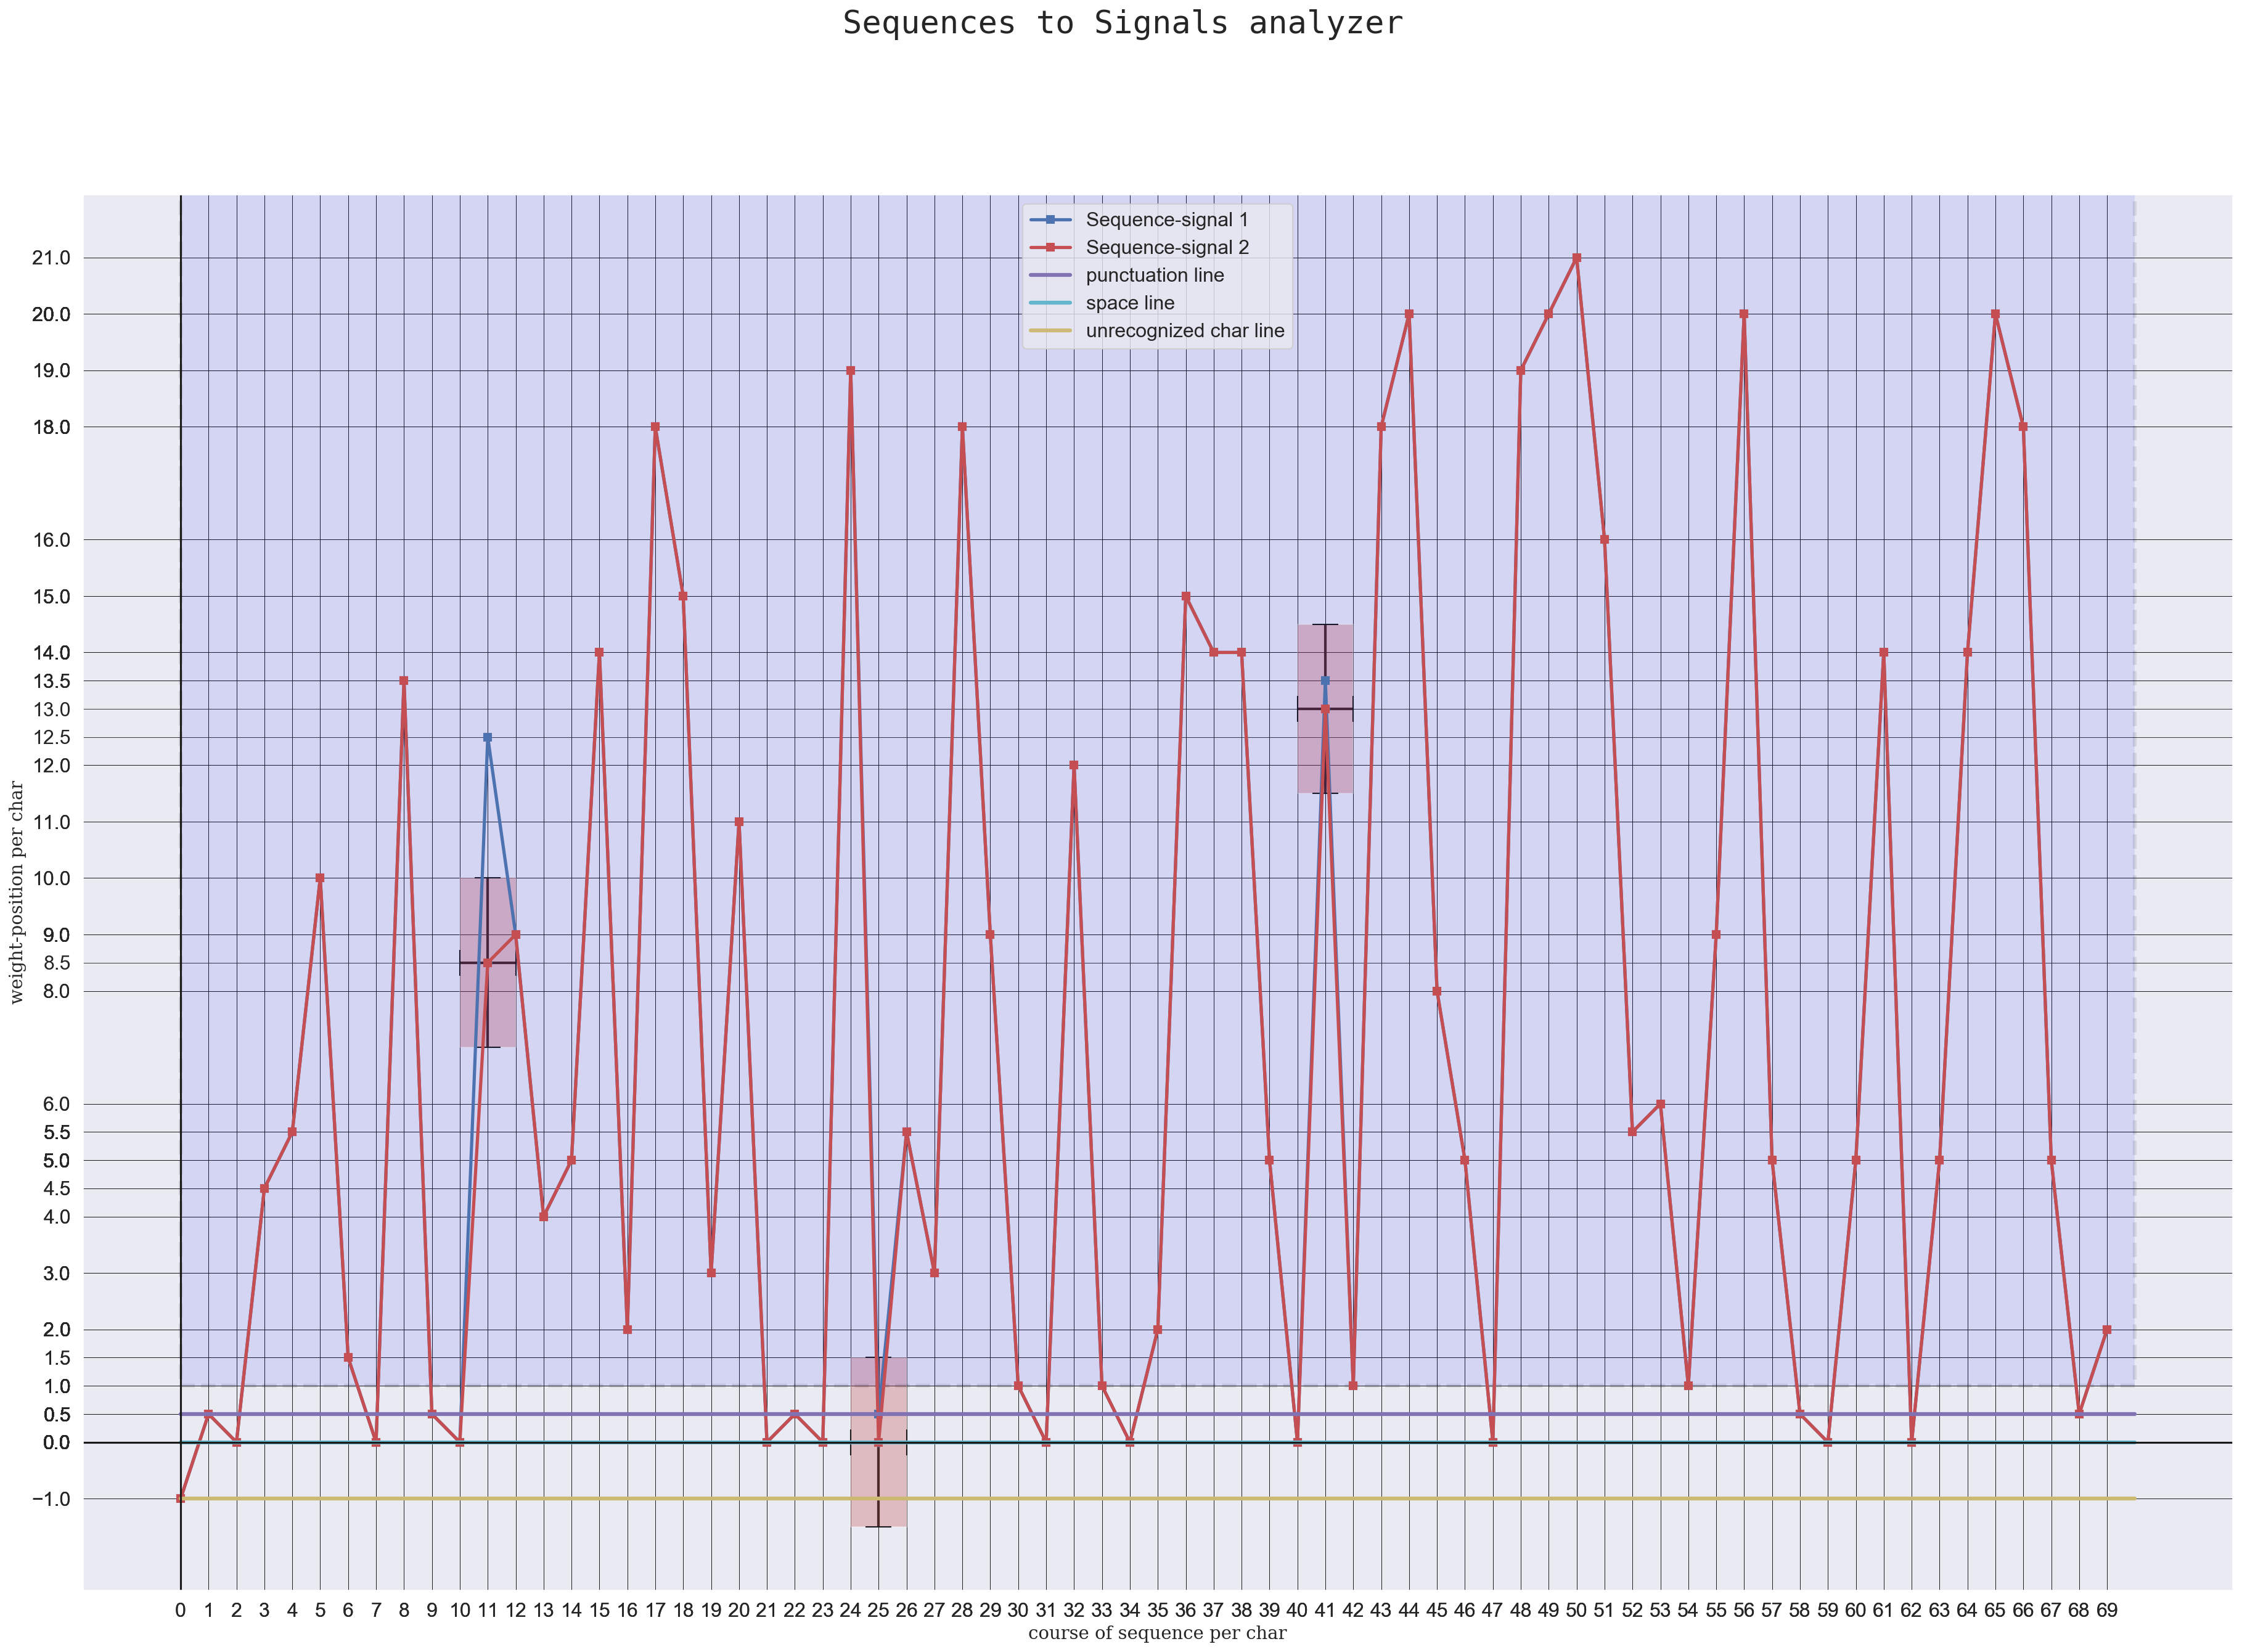

{'a': 1, 'A': 1.5, 'á': 1.5, 'Á': 2.0, 'à': 1.5, 'À': 2.0, 'â': 1.5, 'Â': 2.0, 'ä': 1.5, 'Ä': 2.0, 'ã': 1.5, 'Ã': 2.0, 'å': 1.5, 'Å': 2.0, 'b': 2, 'B': 2.5, 'c': 3, 'C': 3.5, 'ç': 3.5, 'Ç': 4.0, 'd': 4, 'D': 4.5, 'e': 5, 'E': 5.5, 'é': 5.5, 'É': 6.0, 'è': 5.5, 'È': 6.0, 'ê': 5.5, 'Ê': 6.0, 'ë': 5.5, 'Ë': 6.0, 'f': 6, 'F': 6.5, 'g': 7, 'G': 7.5, 'h': 8, 'H': 8.5, 'i': 9, 'I': 9.5, 'í': 9.5, 'Í': 10.0, 'ì': 9.5, 'Ì': 10.0, 'î': 9.5, 'Î': 10.0, 'ï': 9.5, 'Ï': 10.0, 'j': 10, 'J': 10.5, 'k': 11, 'K': 11.5, 'l': 12, 'L': 12.5, 'm': 13, 'M': 13.5, 'n': 14, 'N': 14.5, 'ñ': 14.5, 'Ñ': 15.0, 'o': 15, 'O': 15.5, 'ó': 15.5, 'Ó': 16.0, 'ò': 15.5, 'Ò': 16.0, 'ô': 15.5, 'Ô': 16.0, 'ö': 15.5, 'Ö': 16.0, 'õ': 15.5, 'Õ': 16.0, 'p': 16, 'P': 16.5, 'q': 17, 'Q': 17.5, 'r': 18, 'R': 18.5, 's': 19, 'S': 19.5, 't': 20, 'T': 20.5, 'u': 21, 'U': 21.5, 'ú': 21.5, 'Ú': 22.0, 'ù': 21.5, 'Ù': 22.0, 'û': 21.5, 'Û': 22.0, 'ü': 21.5, 'Ü': 22.0, 'v': 22, 'V': 22.5, 'w': 23, 'W': 23.5, 'x': 24, 'X': 24.5, 'y': 25, 'Y':

In [20]:
# Plot your two sequences_signals in vizualizer
# Create a new PlotSTS() object
vizualizer = PlotSTS(reference, prediction, reference_encrypt, prediction_encrypt, reference_steps, prediction_steps, dictionary, list_deltas)

#use _plot_sentences_signal() for vizualize your sequences-signals

vizualizer._plot_sentences_signal()

# open dictionary for check the corresponding char values on the y axis
print(dictionary)

#### Interprétations des résultats

Ce premier graphe nous renseigne sur les erreurs commisent par un modèle de prédiction telles que :

![Observations sur le graphique](./graph_sequence_signal.png)

- STSig permet de visualiser les erreurs de la séquence de prédiction par un système de boîtes d'erreurs;

- les droites x=0 et x=0.5, représentent repectivement les droites des espaces et la ponctuation (elles sont également personnalisables).

- On peut très bien choisir de travailler sur un autre dictionnaire ou accorder des poids-valeurs aux caractères différents selon le type projet.

**Limites** : cette visualisation ne fonctionne que sur de petit échantillon de phrase de la prédiction comme dans le cas ci-dessous. Sinon, il est toujours possible de sauvegarder le graphique via le paramètre save_figure=True de la méthode ._plot_sentences_signal() pour travailler sur une plus grosse masse de données textuelles. La librairie STSig intègre la possibilité de modifier la taille de l'échantillon grâce au paramètre sample de la méthode ._plot_sentences_signal().

Enfin on peut visualiser un tracé des deltas, la moyenne des deltas et effectuer des probabilités sur le nombre de deltas qui se trouvent plus ou moins éloignés de la moyenne par l'entremise d'intervalles plus ou moins élevés (écart-type avec un coefficient plus ou moins élévé) toujours grâce à la classe PlotSTS().

average of deltas = -0.04
variance of deltas = 20.87
standard deviation of deltas = 4.57


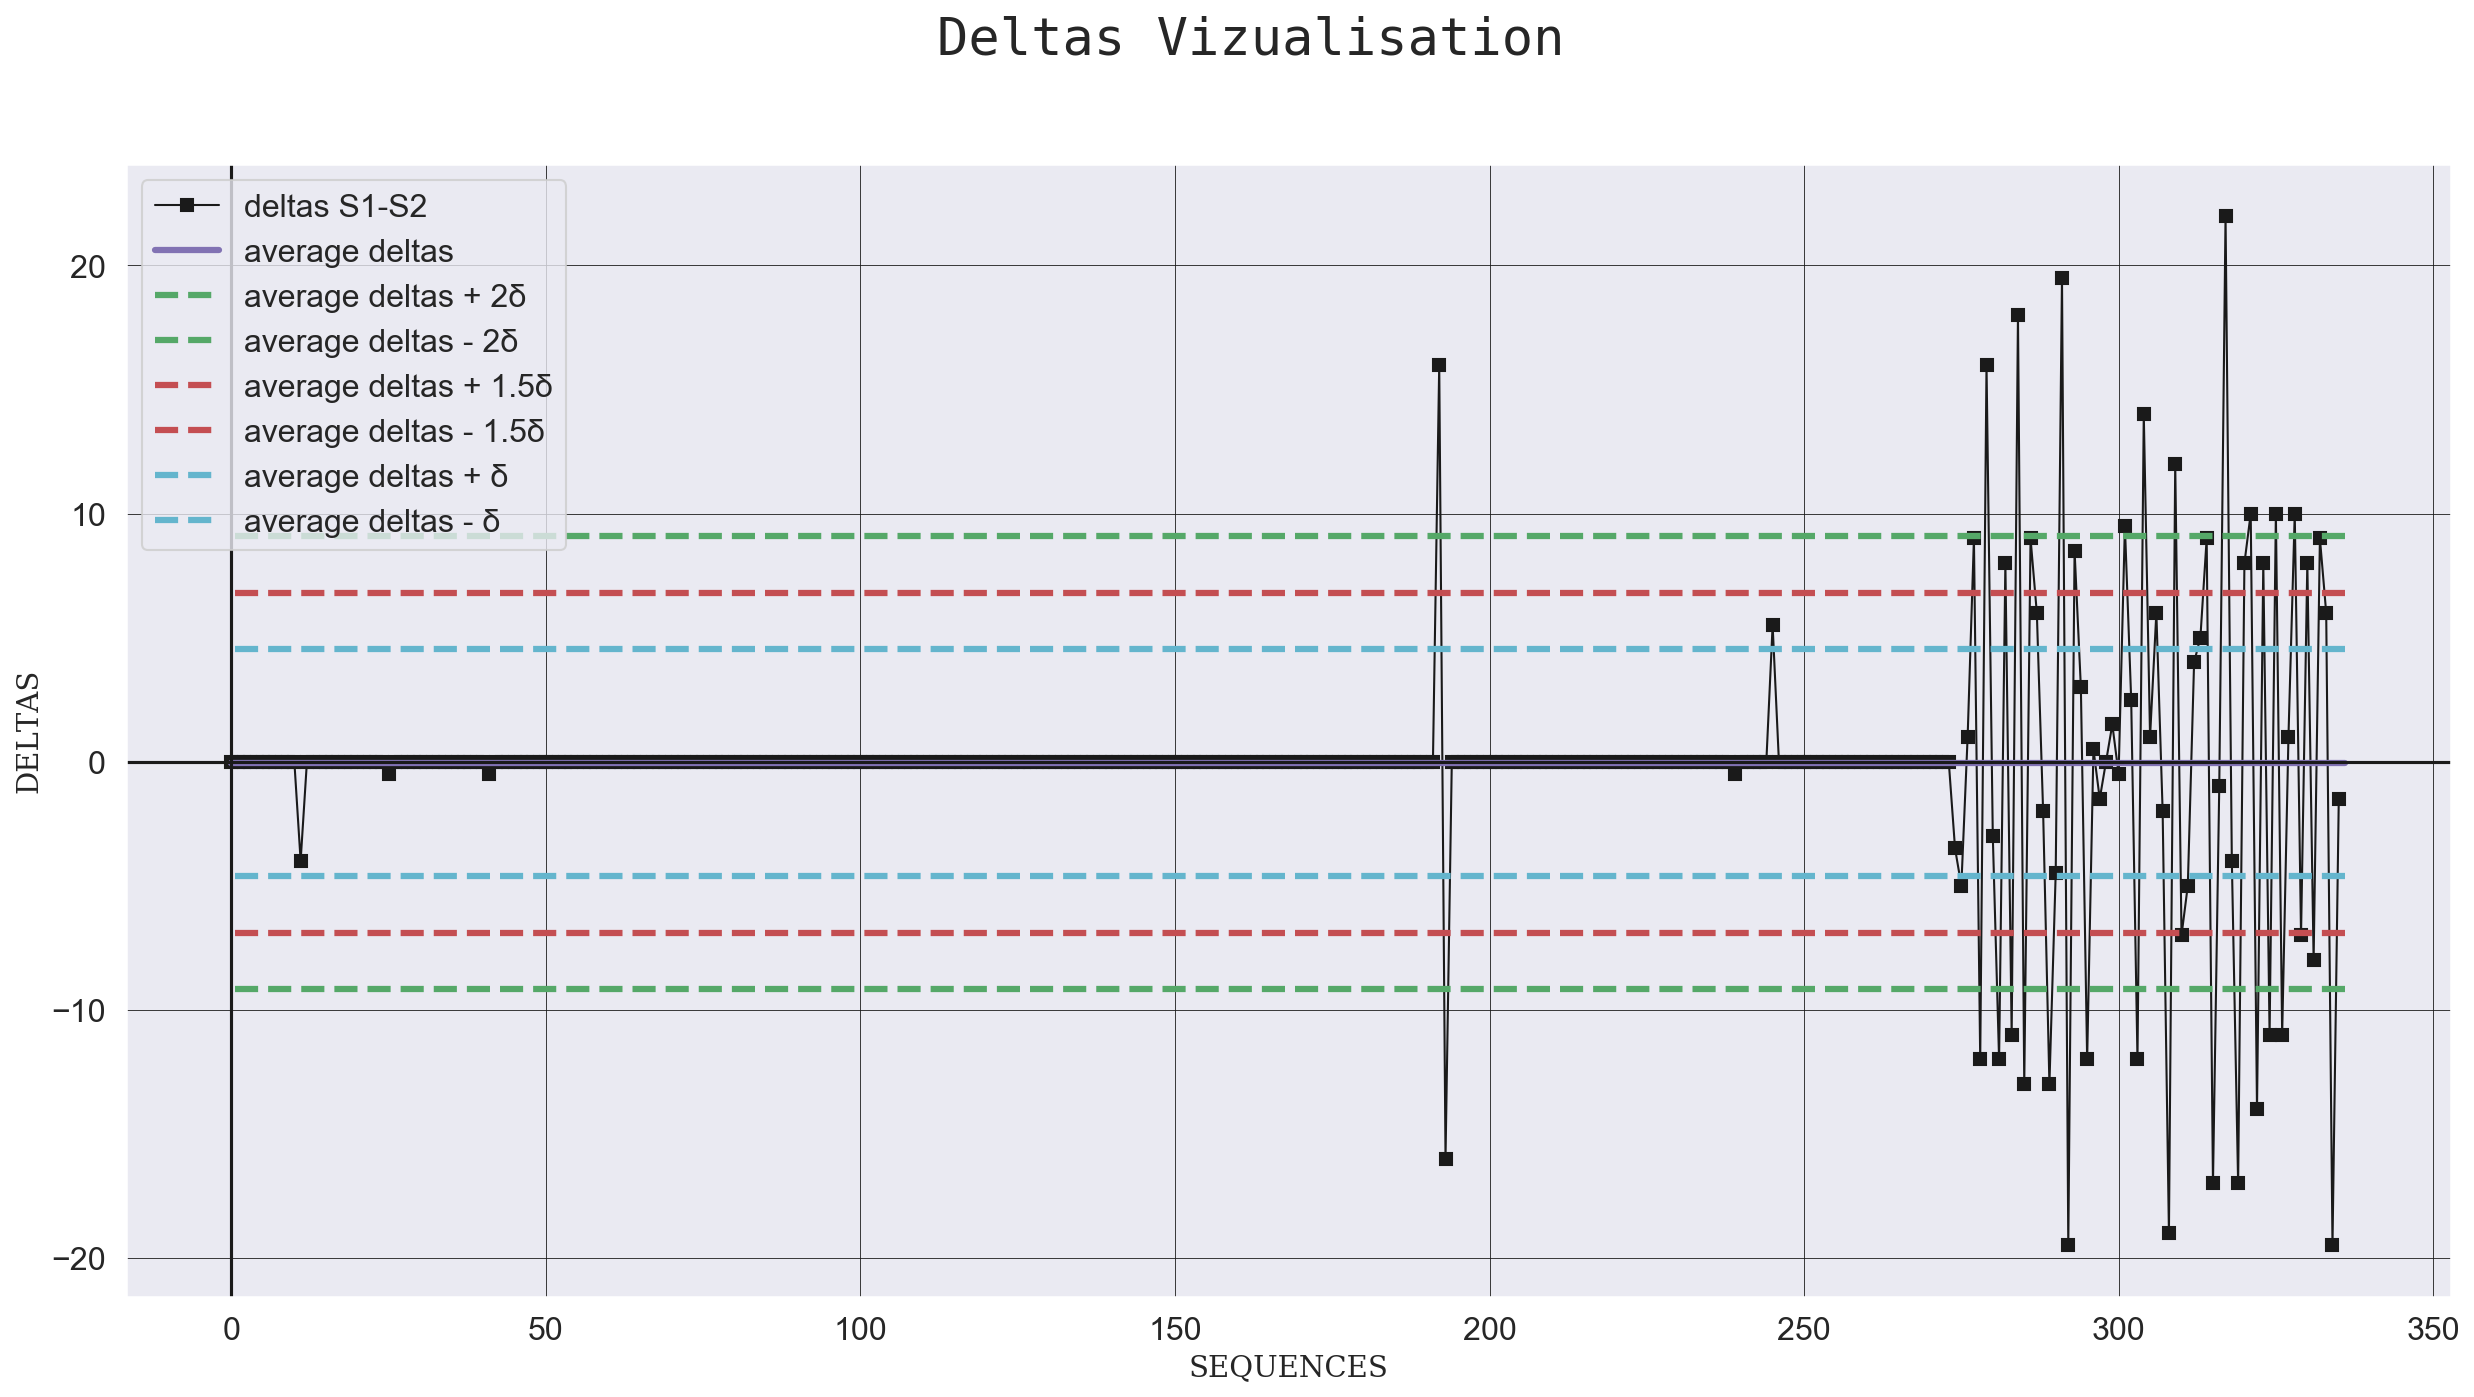

In [21]:
# check your deltas

list_deltas = signal_analyzer.list_deltas

#print(list_deltas)

# check the average of deltas (μ - mu)

average = vizualizer.μ

print(f'average of deltas = %.2f' % average)

# check the dispersion with variance and standard deviation (δ - sigma)

variance = vizualizer.variance
standard_deviation = vizualizer.δ

print(f'variance of deltas = %.2f' % variance)
print(f'standard deviation of deltas = %.2f' % standard_deviation)

# use _plot_probabilities() method on PlotSTS() object

vizualizer._plot_probabilities()


#### Interprétations des résultats

Ce second graphe nous renseigne sur les erreurs commisent par un modèle de prédiction telles que :

![Variations deltas](./Proba_signals.png)


**Limites** : Les métriques et la visualisation de ce dernier exemple seront utiles dans le cadre d'une prédiction de même longueur que la référence (quand le modèle est déjà bon). On peut analyser les fines variations qu'à pu opérer un modèle de type substitution de caractère, accentuation ou capitalisation. 
En revanche, une suppression ou une insertion provoquent des phénomènes d'entropie (terme emprunté à la thermodynamique, indiquant une dispersion trop forte ou un désordre) non interprétables, en cause le décalage des poids-positions de la séquence prédite par rapport aux poids-positions de la séquence de référence qui créée des deltas trop importants.

## Conclusion générale

Tous ces algorithmes n'ont pas la même complexité, ce qui peut ralentir le temps d'execution de certaines fonctions, comme on peut le constater ci-dessous

+ tests temps d'éxecution pour optimiser le choix des fonctions pour l'implémentation

In [22]:
import timeit 
  
# code snippets setup to be executed only once 
setup = """from difflib import SequenceMatcher
from kraken.lib.dataset import _fast_levenshtein
from Levenshtein import distance
import textdistance
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


def get_jaccard_similarity(str1, str2):
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

def get_vectors(*str):
    text = [t for t in str]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()


def get_cosine_sim(*str): 
    vectors = [t for t in get_vectors(*str)]
    return cosine_similarity(vectors)[0][1]
    
    
reference = "— Déjà M. Lidenbrock ! s’écria la bonne Marthe stupéfaite, en entre-bâillant la porte de la salle à manger."
hypothesis =  "— Déjà M. Hidenbrock ! s’écriA a bonen Marthe stupéfaite+ un entre)bâillant la porte de la sPPlle à manger."

"""
  
# code snippets whose execution time is to be measured 
code_Ratcliff_Obershelp = ''' 
SequenceMatcher(a=reference, b=hypothesis).ratio() 
'''

code_Levensthein_Kraken = ''' 
_fast_levenshtein(reference, hypothesis)
'''

code_Levensthein_C_extension = ''' 
distance(reference, hypothesis)
'''

code_Levensthein_Damereau = ''' 
textdistance.damerau_levenshtein(reference, hypothesis)
'''

code_jaccard_similarity = ''' 
get_jaccard_similarity(reference, hypothesis)
'''

code_cosine_similarity = ''' 
get_cosine_sim(reference, hypothesis)
'''
  
# Run tests : timeit statements 
print(f'Ratcliff Obershelp similarity takes {timeit.timeit(setup = setup, stmt = code_Ratcliff_Obershelp, number = 1000)} secs') 
print(f'Levensthein (Python - Kraken) takes {timeit.timeit(setup = setup, stmt = code_Levensthein_Kraken, number = 1000)} secs')
print(f'Levensthein (C extension) takes {timeit.timeit(setup = setup, stmt = code_Levensthein_C_extension, number = 1000)} secs')
print(f'Levensthein-Damereau takes {timeit.timeit(setup = setup, stmt = code_Levensthein_Damereau, number = 1000)} secs')
print(f'Jaccard similarity takes {timeit.timeit(setup = setup, stmt = code_jaccard_similarity, number = 1000)} secs') 
print(f'Cosine similarity takes {timeit.timeit(setup = setup, stmt = code_cosine_similarity, number = 1000)} secs') 

Ratcliff Obershelp similarity takes 0.5363001569999994 secs
Levensthein (Python - Kraken) takes 6.017930717999999 secs
Levensthein (C extension) takes 0.01108644099999978 secs
Levensthein-Damereau takes 20.274681181000002 secs
Jaccard similarity takes 0.0038880820000031235 secs
Cosine similarity takes 0.6560502620000008 secs
